# **Studi Kasus Data Mining: Klasifikasi**

Nama: Golda Aurelia Silalahi

NPM: 2206826173

  <br>

  ### **Predict Students' Dropout and Academic Success**
  **Sumber Data**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

  Dataset ini berisi informasi tentang faktor-faktor yang mempengaruhi keberhasilan akademis dan kemungkinan drop out dari mahasiswa. Data ini mencakup berbagai karakteristik dan atribut mahasiswa serta hasil akademik mereka. Dataset terdiri dari sejumlah observasi dan memiliki kolom-kolom dengan rincian sebagai berikut:

  <br>

  | Variable Name                                | Description                                                                                             |
  |----------------------------------------------|---------------------------------------------------------------------------------------------------------|
  | Marital Status                               | Status perkawinan mahasiswa (1 - Single, 2 - Married, 3 - Widower, 4 - Divorced, 5 - Facto Union, 6 - Legally Separated) |
  | Application Mode                             | Metode penerimaan mahasiswa (misalnya, 1 - General, 7 - Other Higher Courses, 39 - Over 23 years old)  |
  | Application Order                            | Urutan preferensi program studi (0 - First choice, 9 - Last choice)                                     |
  | Course                                       | Program studi yang diambil (misalnya, 33 - Biofuel Technologies, 9003 - Agronomy, 9500 - Nursing)       |
  | Daytime/Evening Attendance                   | Waktu kehadiran mahasiswa (1 - Daytime, 0 - Evening)                                                    |
  | Previous Qualification                       | Tingkat pendidikan sebelum masuk (1 - Secondary education, 4 - Master’s, 14 - 10th year of schooling)   |
  | Previous Qualification (Grade)               | Nilai dari kualifikasi pendidikan sebelumnya (0 - 200)                                                  |
  | Nationality                                  | Kewarganegaraan mahasiswa (1 - Portuguese, 41 - Brazilian, 109 - Colombian)                             |
  | Mother's Qualification                       | Tingkat pendidikan ibu (misalnya, 1 - Secondary education, 5 - Doctorate)                               |
  | Father's Qualification                       | Tingkat pendidikan ayah (mirip dengan kualifikasi ibu)                                                  |
  | Mother's Occupation                          | Pekerjaan ibu (misalnya, 1 - Legislative representatives, 5 - Personal services, 9 - Unskilled workers) |
  | Father's Occupation                          | Pekerjaan ayah (mirip dengan pekerjaan ibu)                                                             |
  | Admission Grade                              | Nilai masuk (0 - 200)                                                                                   |
  | Displaced                                    | Status tempat tinggal (1 - Ya, 0 - Tidak)                                                               |
  | Educational Special Needs                    | Kebutuhan khusus pendidikan (1 - Ya, 0 - Tidak)                                                         |
  | Debtor                                       | Status pembayaran (1 - Ya, 0 - Tidak)                                                                   |
  | Tuition Fees Up to Date                      | Status pembayaran biaya kuliah (1 - Ya, 0 - Tidak)                                                      |
  | Gender                                       | Jenis kelamin mahasiswa (1 - Male, 0 - Female)                                                          |
  | Scholarship Holder                           | Penerima beasiswa (1 - Ya, 0 - Tidak)                                                                   |
  | Age at Enrollment                            | Usia saat pendaftaran                                                                                   |
  | International                                | Status kewarganegaraan internasional (1 - Ya, 0 - Tidak)                                                |
  | Curricular Units 1st Sem (Credited)          | Jumlah unit kurikulum yang disahkan pada semester pertama                                               |
  | Curricular Units 1st Sem (Enrolled)          | Jumlah unit kurikulum yang diambil pada semester pertama                                                |
  | Curricular Units 1st Sem (Evaluations)       | Jumlah evaluasi untuk unit kurikulum pada semester pertama                                              |
  | Curricular Units 1st Sem (Approved)          | Jumlah unit kurikulum yang disetujui pada semester pertama                                              |
  | Curricular Units 1st Sem (Grade)             | Rata-rata nilai pada semester pertama (0 - 20)                                                          |
  | Curricular Units 1st Sem (Without Evaluations)| Jumlah unit kurikulum tanpa evaluasi pada semester pertama                                              |
  | Curricular Units 2nd Sem (Credited)          | Jumlah unit kurikulum yang disahkan pada semester kedua                                                 |
  | Curricular Units 2nd Sem (Enrolled)          | Jumlah unit kurikulum yang diambil pada semester kedua                                                  |
  | Curricular Units 2nd Sem (Evaluations)       | Jumlah evaluasi untuk unit kurikulum pada semester kedua                                                |
  | Curricular Units 2nd Sem (Approved)          | Jumlah unit kurikulum yang disetujui pada semester kedua                                                |
  | Curricular Units 2nd Sem (Grade)             | Rata-rata nilai pada semester kedua (0 - 20)                                                            |
  | Curricular Units 2nd Sem (Without Evaluations)| Jumlah unit kurikulum tanpa evaluasi pada semester kedua                                                |
  | Unemployment Rate                            | Tingkat pengangguran (%)                                                                                |
  | Inflation Rate                               | Tingkat inflasi (%)                                                                                     |
  | GDP                                          | Produk Domestik Bruto                                                                                   |
  | Target                                       | Variabel target untuk klasifikasi tiga kategori (dropout, enrolled, dan graduate)                       |

# Import Library dan Load Data

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [ ]:
# Import libraries yang dibutuhkan

# Utilities
import time
from collections import Counter
from io import StringIO
from tqdm import tqdm
import warnings
from IPython.display import display
import tabulate
import requests

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from scipy.stats import skew

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# Scikit-learn: Machine Learning dan evaluasi model
from sklearn import preprocessing, neighbors, tree, svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    VotingClassifier
)
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.pipeline import make_pipeline
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier

# Scikit-learn: Model selection dan evaluasi
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV,
    StratifiedKFold,
    KFold
)
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    make_scorer,
    mean_squared_error,
    root_mean_squared_error
)

# Scikit-learn: Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier

# CatBoost
from catboost import Pool, CatBoostClassifier, cv

# Setup tampilan plot dan warnings
sns.set(style="ticks", color_codes=True)
warnings.simplefilter('ignore')

In [ ]:
# URL dari GitHub
url = 'https://raw.githubusercontent.com/goldasilalahi/data-mining-and-business-intelligence/refs/heads/main/data.csv'

# Mengunduh dan membaca file CSV dengan delimiter ';'
df = pd.read_csv(url, delimiter=';')

# Menampilkan beberapa data awal dari file
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Ditampilkan 5 data pertama dari total 4424 data sebagai gambaran data keseluruhan dengan 37 variabel

# Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(4424, 37)

Terlihat bahwa jumlah data ialah sebanyak 4424 dengan 37 variabel

In [ ]:
# Cek Missing Values
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


Tidak ada missing values

In [ ]:
# Cek duplikasi data
df.duplicated().sum()

0

Tidak ada duplikasi data

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

Berikut adalah 37 variabel yang terdapat pada data

In [ ]:
# Ubah ' ' menjadi '_' pada df
df.columns = [x.replace(' ', '_') for x in df.columns]

In [ ]:
# menghitung jumlah variabel 'Target' pada data
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


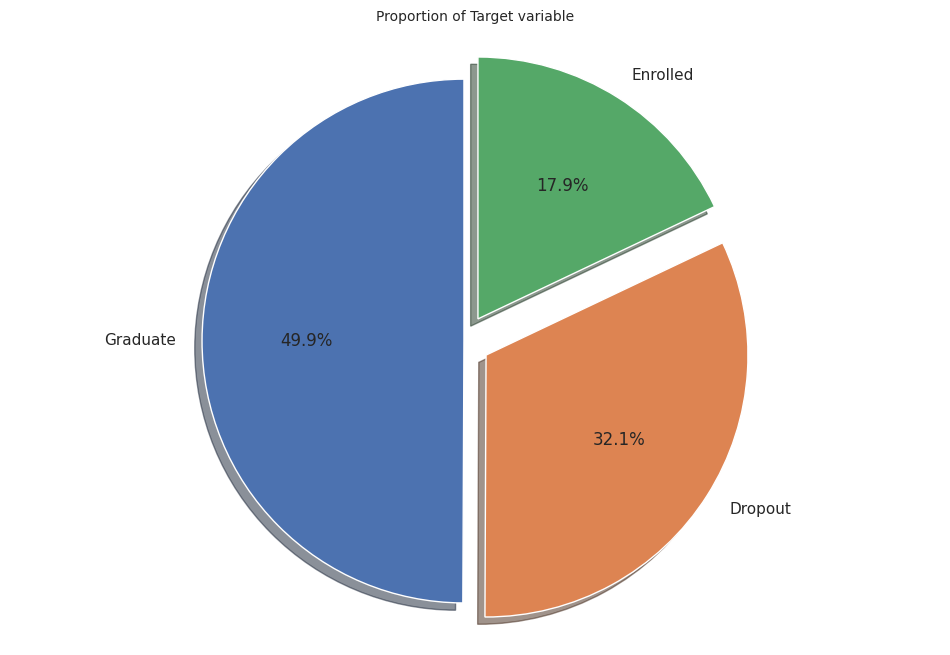

In [ ]:
# Pie chart untuk menampilkan distribusi jumlah (persentase) Variabel Target
labels = 'Graduate', 'Dropout', 'Enrolled'
sizes = [df.Target[df['Target']=='Graduate'].count(), df.Target[df['Target']=='Dropout'].count(), df.Target[df['Target']=='Enrolled'].count()]
explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Target variable", size = 10)
plt.show()

In [ ]:
# Membuat data frame terpisah untuk variabel random kontinu
data_num = df.select_dtypes(include=['float64'])
data_num

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade),Unemployment_rate,Inflation_rate,GDP
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...
4419,125.0,122.2,13.600000,12.666667,15.5,2.8,-4.06
4420,120.0,119.0,12.000000,11.000000,11.1,0.6,2.02
4421,154.0,149.5,14.912500,13.500000,13.9,-0.3,0.79
4422,180.0,153.8,13.800000,12.000000,9.4,-0.8,-3.12


Terdapat 7 variabel numerik memiliki type data float yaitu



| Variabel Name  | Description   |
|-----------|-----------|
| Previous Qualification (Grade)	| Nilai dari kualifikasi pendidikan sebelumnya (0 - 200)    
| Admission Grade	    | Nilai masuk (0 - 200)    |
| Curricular Units 1st Sem (Grade)		| Rata-rata nilai pada semester pertama (0 - 20)    
| Curricular Units 2nd Sem (Grade)    | Rata-rata nilai pada semester kedua (0 - 20)    |
| Unemployment Rate	|Tingkat pengangguran (%)|
|Inflation Rate	|Tingkat inflasi (%)|
|GDP|	Produk Domestik Bruto	|


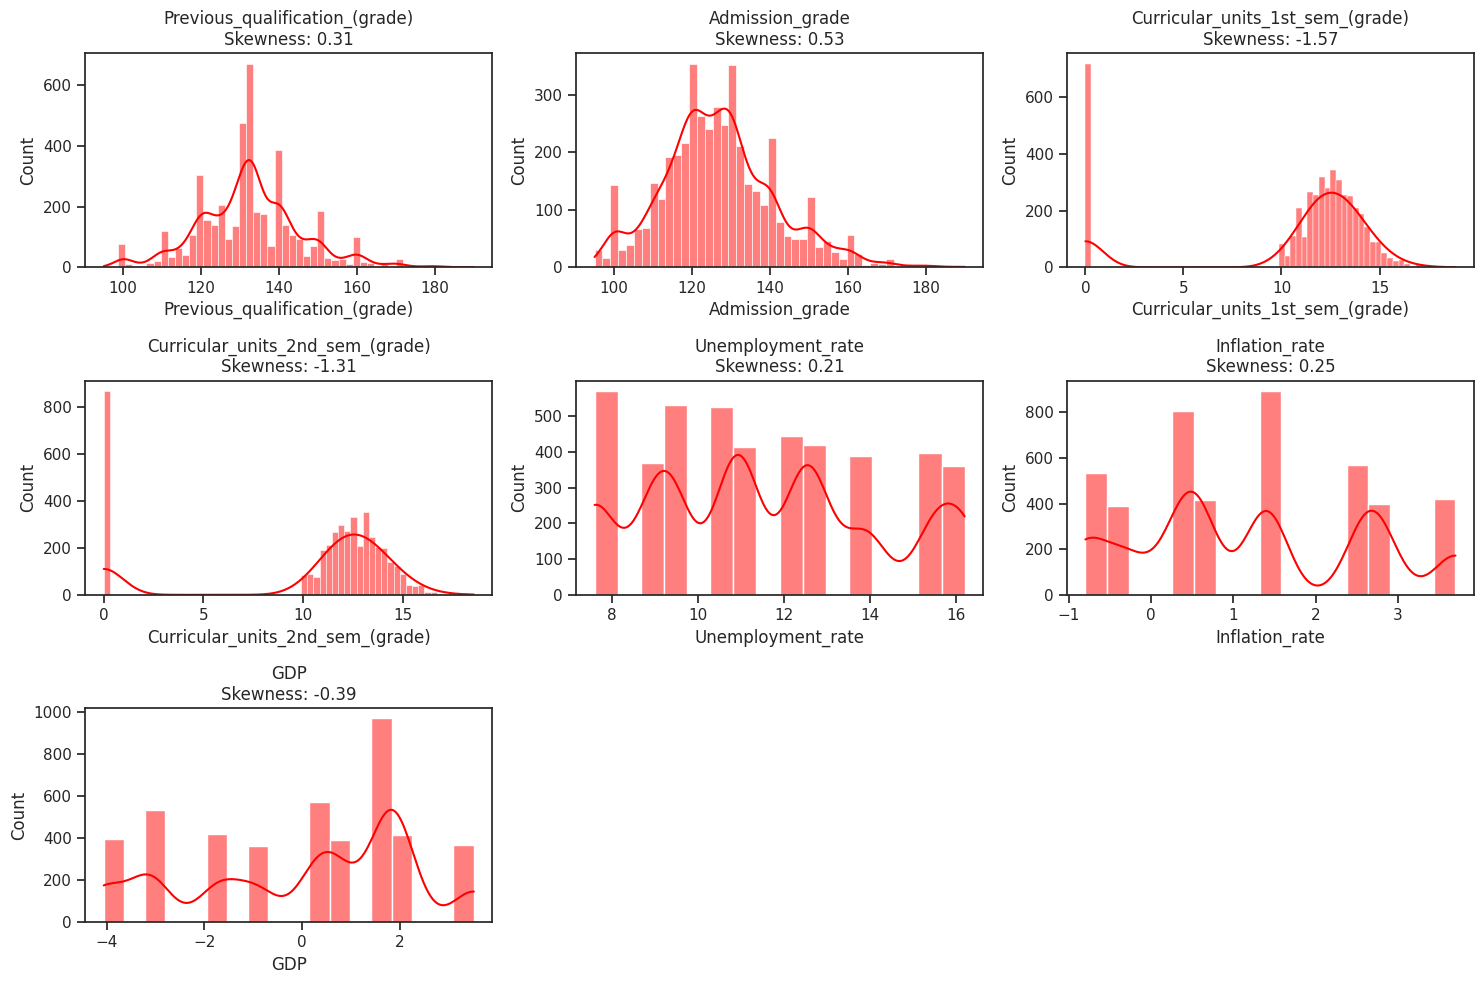

In [ ]:
plt.figure(figsize=(15, 10))

# Looping melalui setiap kolom numerik
for i, col in enumerate(data_num.columns, 1):
    plt.subplot(3, 3, i)  # Menentukan subplot untuk setiap variabel
    sns.histplot(df[col], kde=True, color='red')  # Menggunakan `histplot` untuk distribusi
    skew_value = skew(df[col].dropna())  # Menghitung skewness, abaikan nilai NaN
    plt.title(f"{col}\nSkewness: {skew_value:.2f}")  # Menampilkan skewness pada judul

plt.tight_layout()  # Mengatur tata letak agar tidak bertumpuk
plt.show()

**Insight**

- Previous_qualification_(grade)
Skewness: 0.31 (positif ringan): Data distribusi hampir simetris, dengan sedikit pergeseran ke kanan. Hal ini menunjukkan bahwa sebagian besar nilai cenderung berada di sekitar rata-rata dengan sedikit outlier di ujung atas.
Admission_grade:

- Admission_Grade
Skewness: 0.53 (positif ringan): Distribusi sedikit miring ke kanan, menunjukkan bahwa mayoritas nilai berkumpul di sisi yang lebih rendah (di bawah rata-rata), dengan beberapa outlier di sisi kanan.
Curricular_units_1st_sem_(grade):

- Curricular_units_1st_sem_(grade):
Skewness: -1.57 (negatif): Distribusi sangat miring ke kiri, menunjukkan bahwa sebagian besar nilai terkonsentrasi di sisi kanan (nilai tinggi), dengan beberapa outlier di sisi kiri.
Curricular_units_2nd_sem_(grade):

- Curricular_units_2nd_sem_(grade):
Skewness: -1.31 (negatif): Distribusi miring ke kiri, mirip dengan variabel sebelumnya, tetapi tidak se-ekstrim. Nilai tinggi lebih umum dibandingkan nilai rendah.
Unemployment_rate:

- Unemployment_rate :
Skewness: 0.21 (positif ringan): Data hampir simetris, dengan distribusi sedikit miring ke kanan. Ini menunjukkan bahwa tingkat pengangguran cenderung merata, tetapi dengan beberapa nilai di sisi atas.
Inflation_rate:

- Inflation_rate :
Skewness: 0.25 (positif ringan): Distribusi hampir simetris dengan sedikit pergeseran ke kanan. Ini menunjukkan sebagian besar data berada di sekitar nilai tengah.
GDP:

- GDP :
Skewness: -0.39 (negatif ringan): Distribusi sedikit miring ke kiri, menunjukkan bahwa nilai GDP lebih sering berada di sisi yang lebih tinggi, dengan sedikit outlier di sisi kiri.

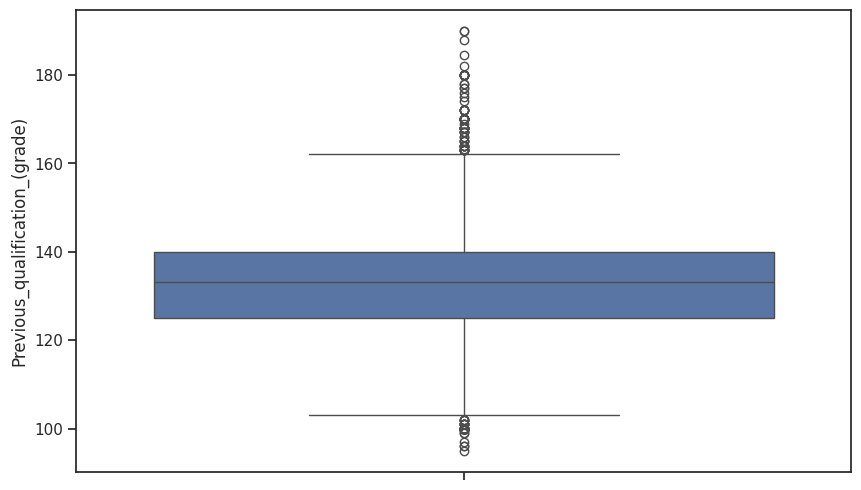

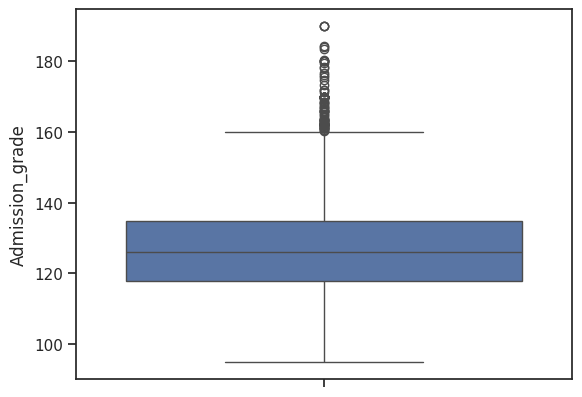

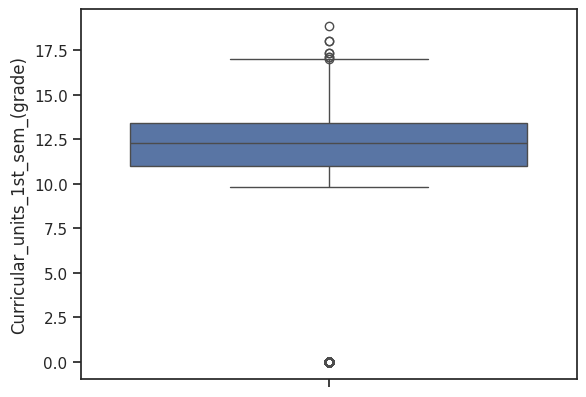

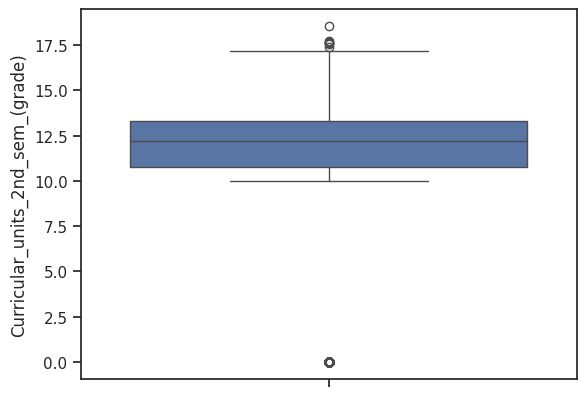

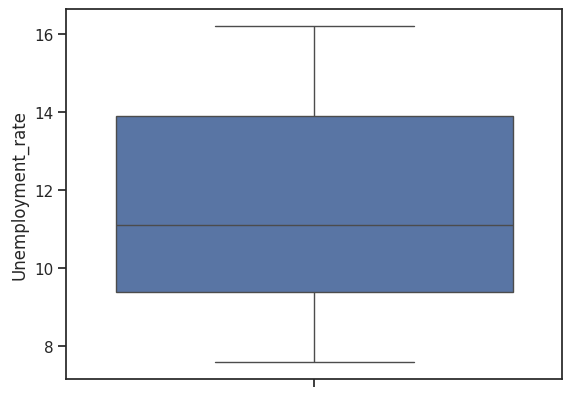

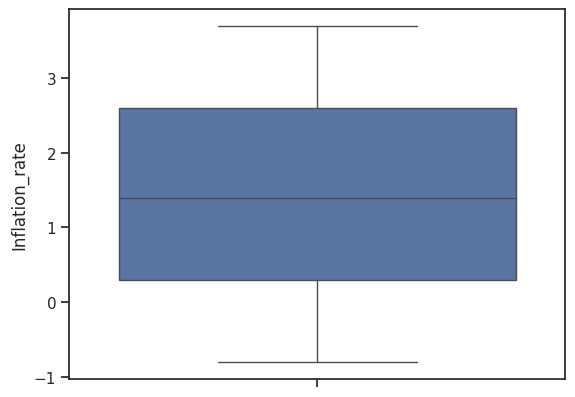

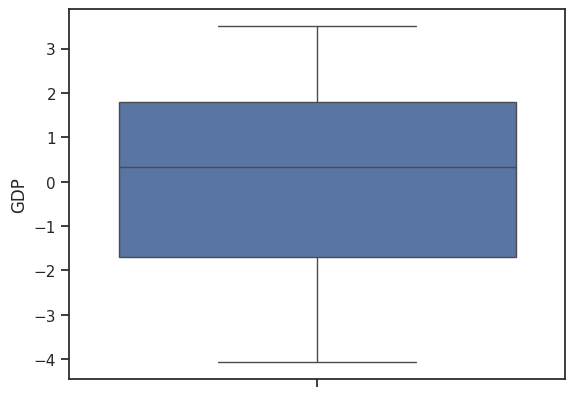

In [ ]:
# BoxPlot
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.boxplot(df[i])
    plt.show()

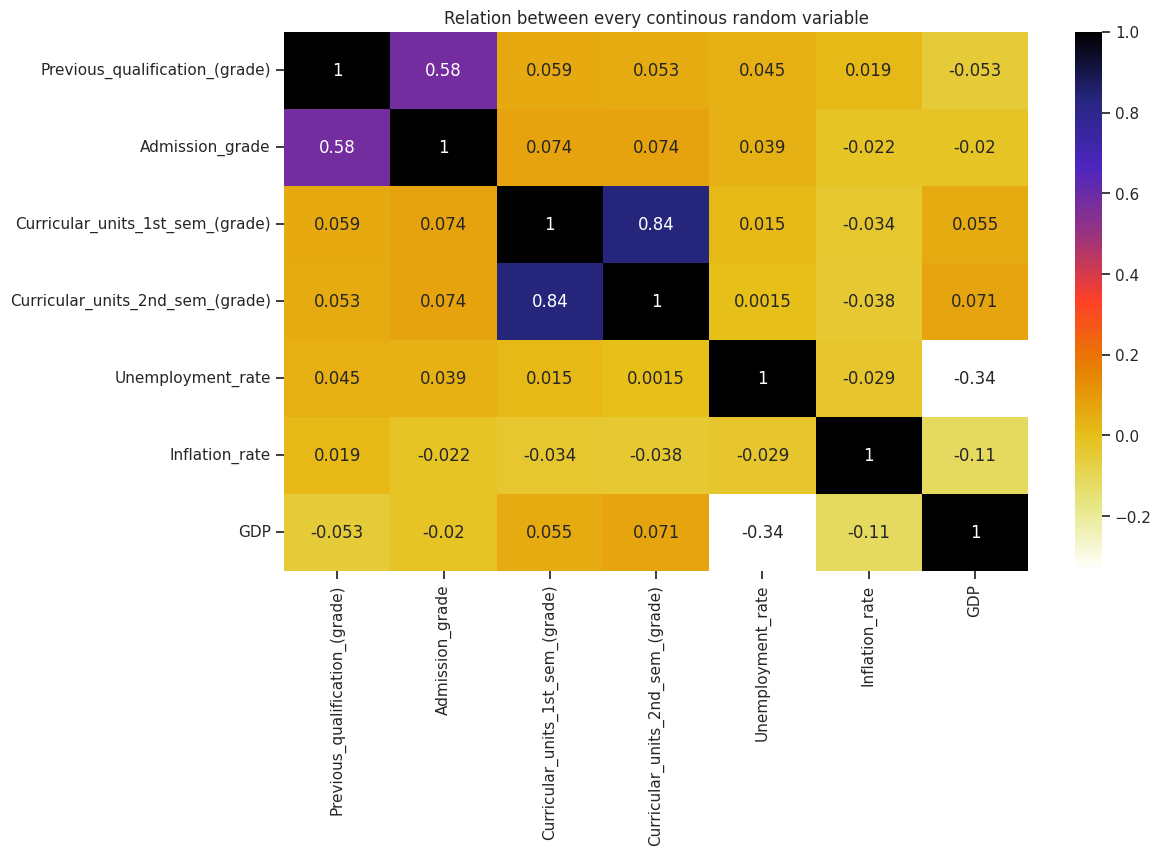

In [ ]:
# Displaying Correlation between numerical varaibles using heatmap
plt.figure(figsize=(12, 7))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Relation between every continous random variable')
plt.show()

**Interpretasi**

- **Korelasi Positif yang Kuat:**

    Curricular_units_1st_sem (grade) dan Curricular_units_2nd_sem (grade) memiliki nilai korelasi yang sangat tinggi (0.84). Ini menunjukkan hubungan positif yang sangat kuat antara kedua variabel. Artinya, jika performa pada semester pertama meningkat, performa pada semester kedua cenderung meningkat juga.

- **Korelasi Sedang:**

    Previous_qualification (grade) dan Admission_grade memiliki korelasi sedang (0.58). Ini menunjukkan bahwa kualifikasi sebelumnya memengaruhi tingkat penerimaan, meskipun tidak secara sempurna.

- **Korelasi Negatif Lemah:**

    GDP memiliki korelasi negatif lemah dengan Unemployment_rate (-0.34). Hal ini menunjukkan bahwa ketika GDP meningkat, tingkat pengangguran cenderung menurun, meskipun hubungannya tidak terlalu signifikan.

- **Korelasi yang Hampir Tidak Ada:**

    Beberapa variabel, seperti Inflation_rate dengan Curricular_units_1st_sem (grade), memiliki korelasi mendekati nol (-0.034). Ini menunjukkan tidak adanya hubungan linier antara kedua variabel tersebut.

In [ ]:
# List dari variabel random kontinu
num_data = [cname for cname in df.columns if df[cname].dtypes in ['float64']]
num_data

['Previous_qualification_(grade)',
 'Admission_grade',
 'Curricular_units_1st_sem_(grade)',
 'Curricular_units_2nd_sem_(grade)',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [ ]:
# List dari variabel random diskrit
cat_cols = df._get_numeric_data().columns
cat_cols

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance\t', 'Previous_qualification',
       'Previous_qualification_(grade)', 'Nacionality',
       'Mother's_qualification', 'Father's_qualification',
       'Mother's_occupation', 'Father's_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd

In [ ]:
# Separate discrete and continous random variables
cols = list(set(cat_cols) - set(num_data))
cols

["Father's_qualification",
 'Curricular_units_2nd_sem_(credited)',
 'Daytime/evening_attendance\t',
 "Father's_occupation",
 'Application_order',
 'Curricular_units_1st_sem_(credited)',
 'Curricular_units_2nd_sem_(enrolled)',
 'Previous_qualification',
 'Curricular_units_1st_sem_(approved)',
 'Curricular_units_2nd_sem_(without_evaluations)',
 "Mother's_qualification",
 'Course',
 'Displaced',
 'Tuition_fees_up_to_date',
 'Age_at_enrollment',
 'Application_mode',
 'Debtor',
 "Mother's_occupation",
 'Marital_status',
 'Curricular_units_2nd_sem_(evaluations)',
 'Curricular_units_1st_sem_(enrolled)',
 'International',
 'Curricular_units_1st_sem_(without_evaluations)',
 'Gender',
 'Curricular_units_2nd_sem_(approved)',
 'Scholarship_holder',
 'Educational_special_needs',
 'Curricular_units_1st_sem_(evaluations)',
 'Nacionality']

In [ ]:
len(cols)

29

### Visualisasi

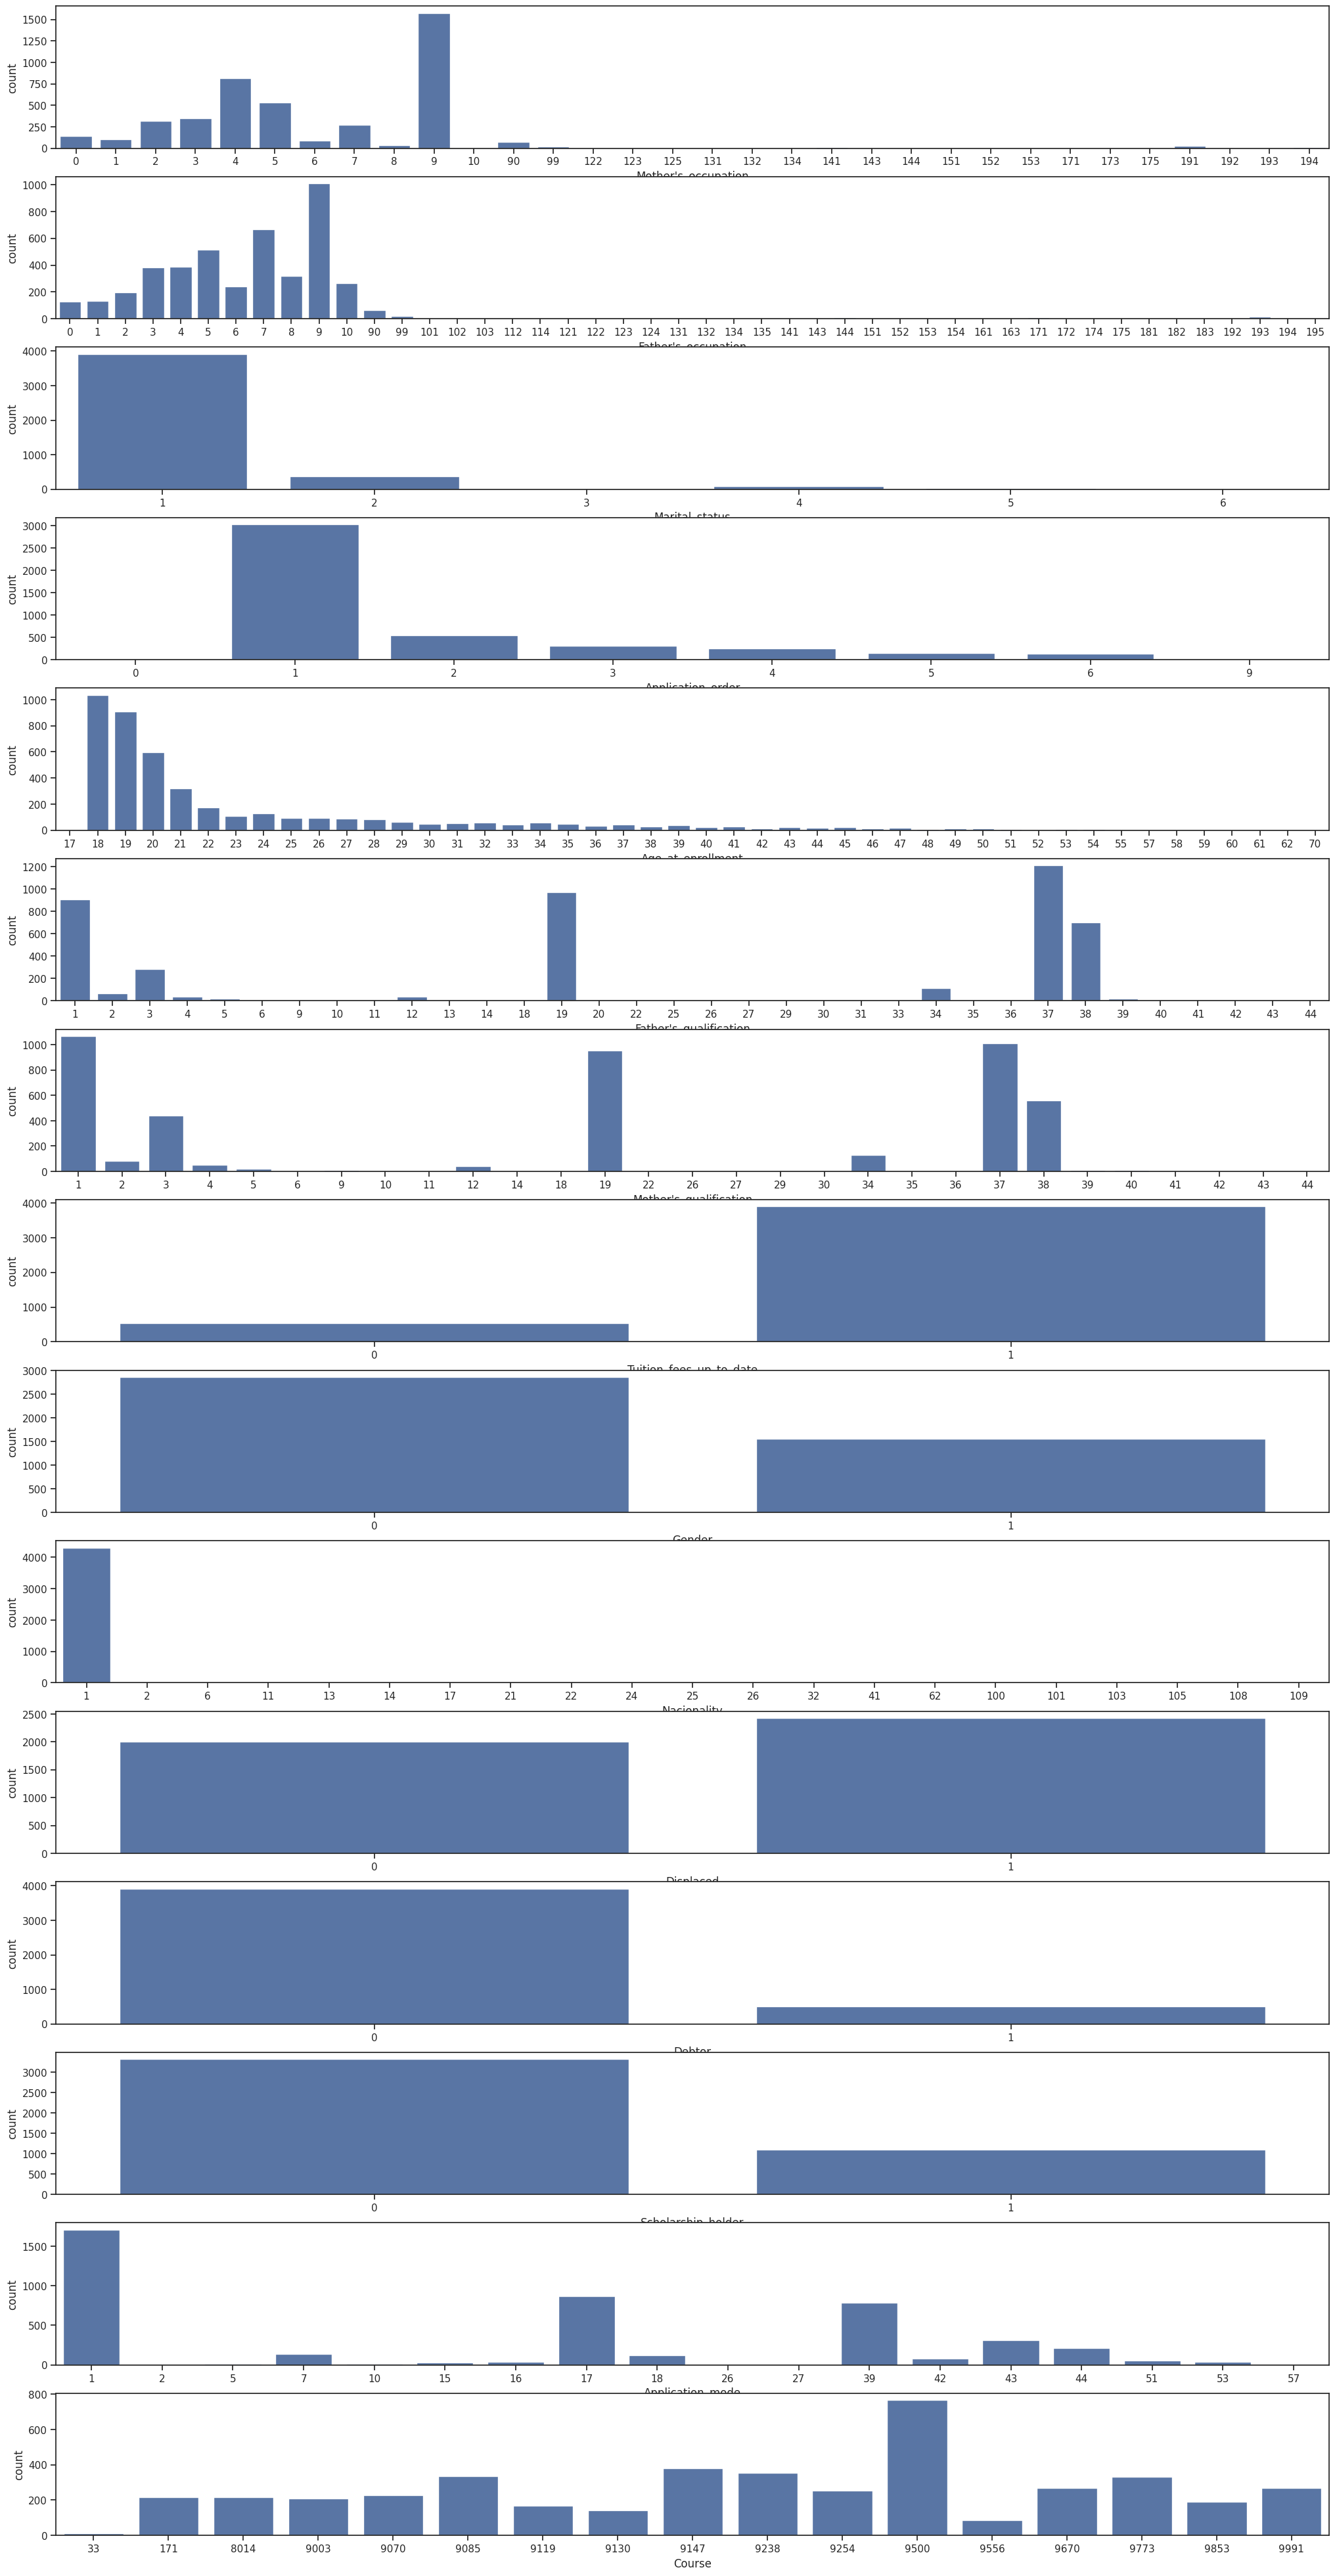

In [ ]:
fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(25, 50))

cols_ = ["Mother's_occupation",
 "Father's_occupation",
 'Marital_status',
 'Application_order',
 'Age_at_enrollment',
 "Father's_qualification",
 "Mother's_qualification",
 'Tuition_fees_up_to_date',
 'Gender',
  "Nacionality",
 'Displaced',
 'Debtor',
 "Scholarship_holder",
 'Application_mode',
 'Course']

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=df, ax=ax[ind])

#### **Insights**

  1. Sebagian besar ibu siswa bekerja sebagai pekerja tidak terampil, diikuti oleh staf administrasi, petugas keamanan, dan penjual.
  2. Sebagian besar ayah siswa bekerja sebagai pekerja tidak terampil, diikuti oleh pekerja terampil di industri, petugas keamanan, staf keamanan, dan penjual.
  3. Lebih dari 90% siswa dalam dataset yang diberikan berstatus lajang.
  4. Mayoritas siswa terdaftar pada usia 18, 19, dan 20 tahun.
  5. Sebagian besar orang tua memiliki tingkat pendidikan yang sangat dasar, mulai dari kelas 5 hingga kelas 12.
  6. Lebih dari 90% siswa membayar biaya kuliah tepat waktu.
  7. Dalam kelompok siswa ini, lebih dari 60% adalah perempuan.
  8. Hampir semua siswa dalam kelompok ini berasal dari Portugal.
  9. Sebagian besar siswa dalam kelompok ini bukan penerima beasiswa.
  10. Mayoritas siswa dalam kelompok ini mengikuti fase pertama mode pendaftaran, diikuti oleh fase kedua.
  11. Sebagian besar siswa mendaftar di program studi Keperawatan, diikuti oleh Manajemen, Layanan Sosial, Jurnalistik, dan Komunikasi.

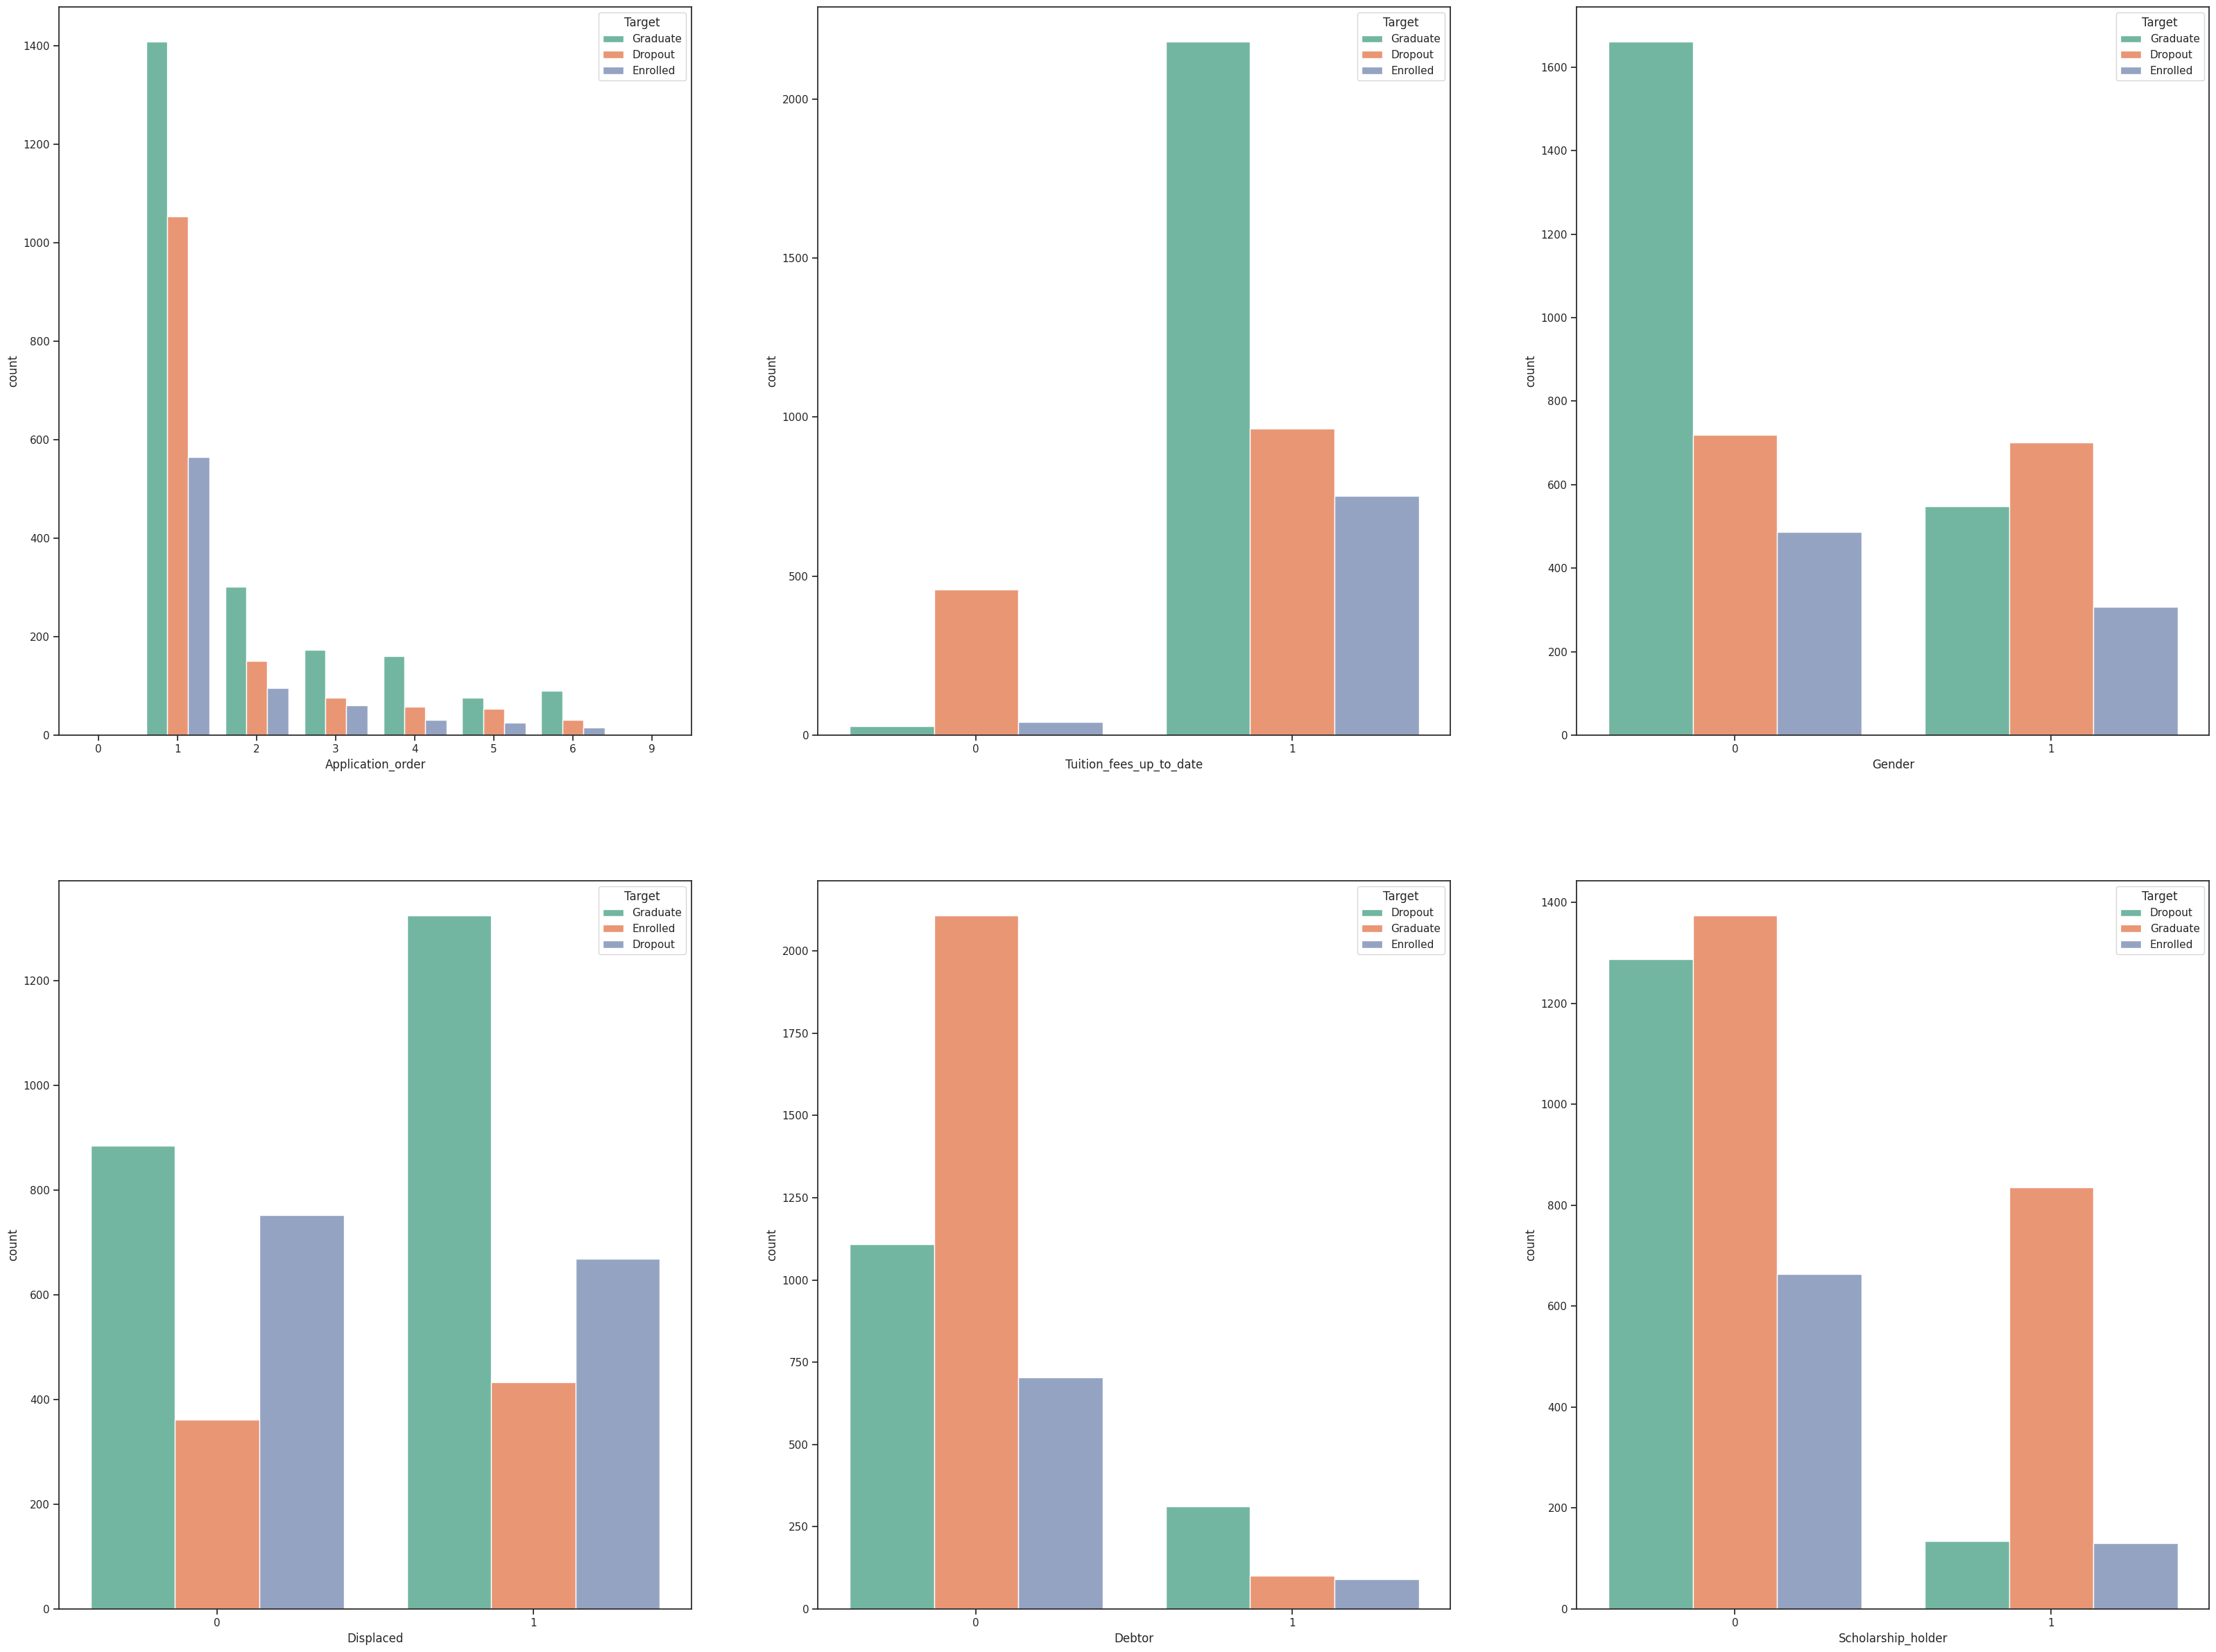

In [ ]:
# Analisis dampak masing-masing variabel terhadap Variabel Target

fig, ax = plt.subplots(2, 3, figsize=(40, 30))

sns.countplot(x='Application_order', hue='Target', data=df, palette='Set2', ax=ax[0][0])
sns.countplot(x='Tuition_fees_up_to_date', hue='Target', data=df, palette='Set2', ax=ax[0][1])
sns.countplot(x='Gender', hue='Target', data=df, palette='Set2', ax=ax[0][2])
sns.countplot(x='Displaced', hue='Target', data=df, palette='Set2', ax=ax[1][0])
sns.countplot(x='Debtor', hue='Target', data=df, palette='Set2', ax=ax[1][1])
sns.countplot(x='Scholarship_holder', hue='Target', data=df, palette='Set2', ax=ax[1][2])


plt.show()

#### **Insights**

1. Siswa yang tidak membayar biaya kuliah tepat waktu memiliki kemungkinan lebih tinggi untuk drop out.
2. Sebagian besar siswa laki-laki yang mengalami drop out.
3. Siswa yang memiliki utang memiliki peluang lebih besar untuk drop out.

# Preprocessing / Data Preparation

## Data Cleaning

Berdasarkan EDA, tidak ada missing values dan duplikasi data

In [ ]:
# Handling Categorical Data
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

#### Outlier

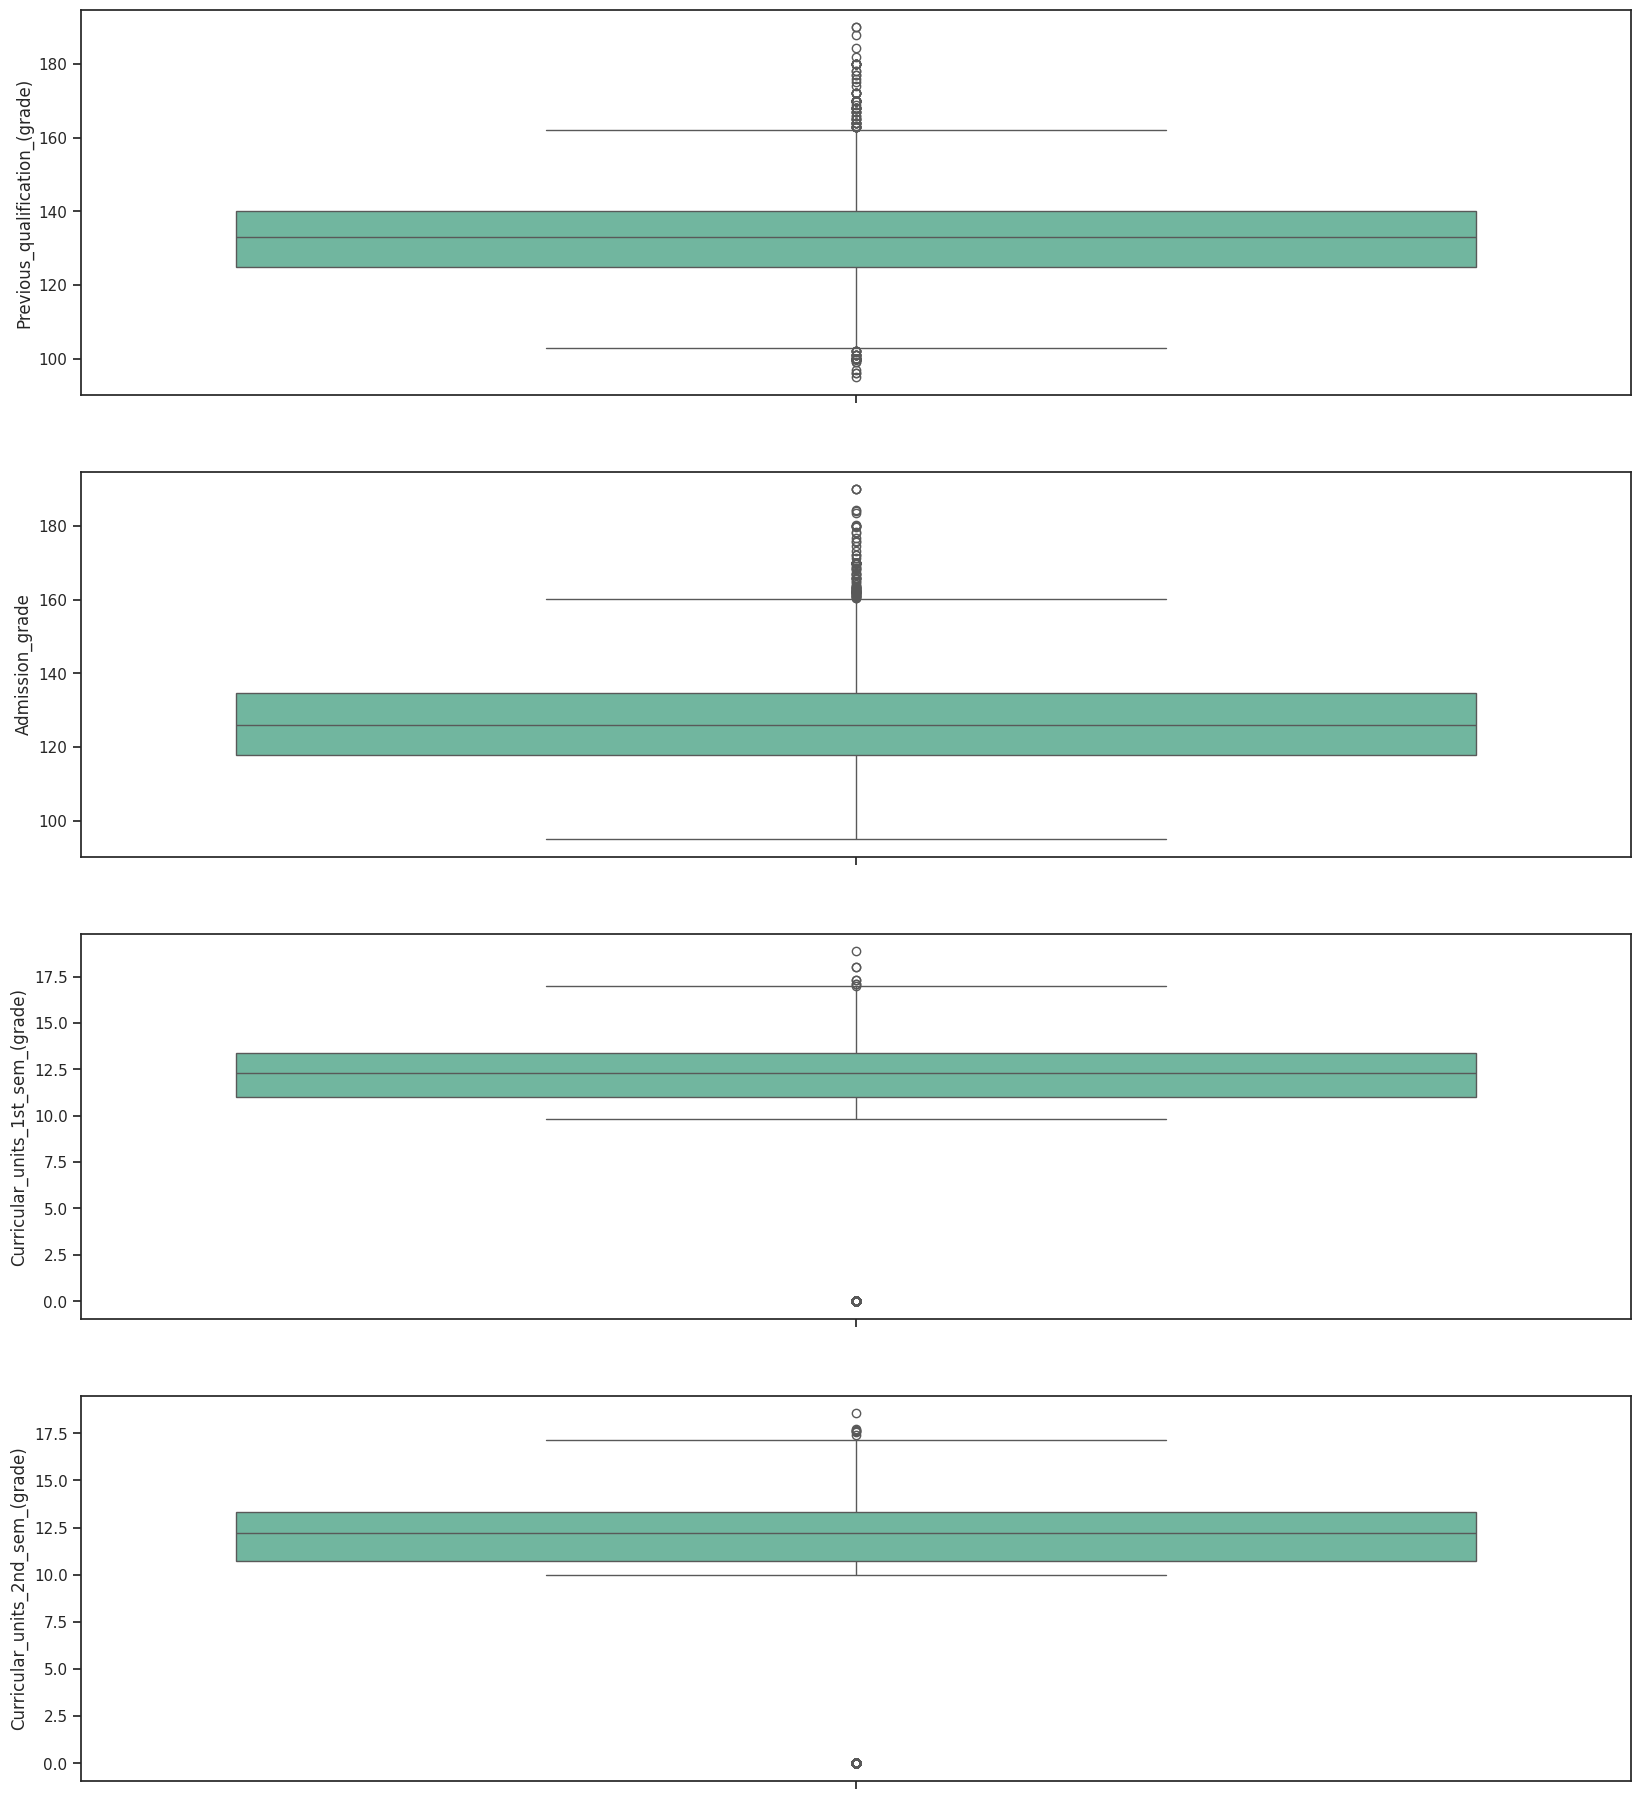

In [ ]:
# Handling Outlier
fig, axs = plt.subplots(4,1, figsize = (20, 23))
plt1 = sns.boxplot(df['Previous_qualification_(grade)'], ax = axs[0], palette = 'BuGn')
plt1 = sns.boxplot(df['Admission_grade'], ax = axs[1], palette = 'BuGn')
plt1 = sns.boxplot(df['Curricular_units_1st_sem_(grade)'], ax = axs[2], palette = 'BuGn')
plt1 = sns.boxplot(df['Curricular_units_2nd_sem_(grade)'], ax = axs[3], palette = 'BuGn')

plt.show()

Boxplot dari 4 variabel random kontinu (Previous_qualification_(grade), Admission_grade, Curricular_units_1st_sem_(grade), Curricular_units_2nd_sem_(grade)) dengan outlier

In [ ]:
df[['Previous_qualification_(grade)', 'Admission_grade', 'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)']].describe()

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade)
count,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,10.640822,10.230206
std,13.188332,14.482001,4.843663,5.210808
min,95.000000,95.000000,0.000000,0.000000
25%,125.000000,117.900000,11.000000,10.750000
50%,133.100000,126.100000,12.285714,12.200000
75%,140.000000,134.800000,13.400000,13.333333
max,190.000000,190.000000,18.875000,18.571429


**Insight**

- Nilai pada Previous qualification dan Admission grade menunjukkan rentang nilai yang lebih tinggi dibandingkan nilai pada Curricular units.
- Variasi pada Curricular units (dibuktikan oleh standar deviasi yang lebih besar) mencerminkan kebebasan siswa dalam memilih jumlah unit kurikulum.
- Rata-rata nilai pada semester pertama sedikit lebih tinggi dibandingkan semester kedua, tetapi rentangnya cukup mirip.

In [ ]:
# Outlier Treatment for Previous_qualification_(grade)

Q1 = df['Previous_qualification_(grade)'].quantile(0.25)
Q3 = df['Previous_qualification_(grade)'].quantile(0.75)

IQR = Q3 - Q1
df = df[(df['Previous_qualification_(grade)'] >= Q1 - 3*IQR) & (df['Previous_qualification_(grade)'] <= Q3 + 3*IQR)]


# Outlier Treatment for Admission_grade

Q1 = df['Admission_grade'].quantile(0.25)
Q3 = df['Admission_grade'].quantile(0.75)

IQR = Q3 - Q1
df = df[(df['Admission_grade'] >= Q1 - 3*IQR) & (df['Admission_grade'] <= Q3 + 3*IQR)]


# Outlier Treatment for Curricular_units_1st_sem_(grade)'

Q1 = df['Curricular_units_1st_sem_(grade)'].quantile(0.25)
Q3 = df['Curricular_units_1st_sem_(grade)'].quantile(0.75)

IQR = Q3 - Q1
df = df[(df['Curricular_units_1st_sem_(grade)'] >= Q1 - 3*IQR) & (df['Curricular_units_1st_sem_(grade)'] <= Q3 + 3*IQR)]


# Outlier Treatment for Curricular_units_2nd_sem_(grade)'

Q1 = df['Curricular_units_2nd_sem_(grade)'].quantile(0.25)
Q3 = df['Curricular_units_2nd_sem_(grade)'].quantile(0.75)

IQR = Q3 - Q1
df = df[(df['Curricular_units_2nd_sem_(grade)'] >= Q1 - 3*IQR) & (df['Curricular_units_2nd_sem_(grade)'] <= Q3 + 3*IQR)]


df[['Previous_qualification_(grade)', 'Admission_grade', 'Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)']].describe()

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade)
count,3509.000000,3509.000000,3509.000000,3509.000000
mean,132.599231,127.084981,12.749182,12.745582
std,12.977814,13.769560,1.328290,1.372024
min,95.000000,95.000000,10.000000,10.000000
25%,124.000000,118.400000,11.800000,11.750000
50%,133.000000,126.300000,12.666667,12.666667
75%,140.000000,134.500000,13.600000,13.666667
max,184.400000,184.400000,18.875000,18.571429


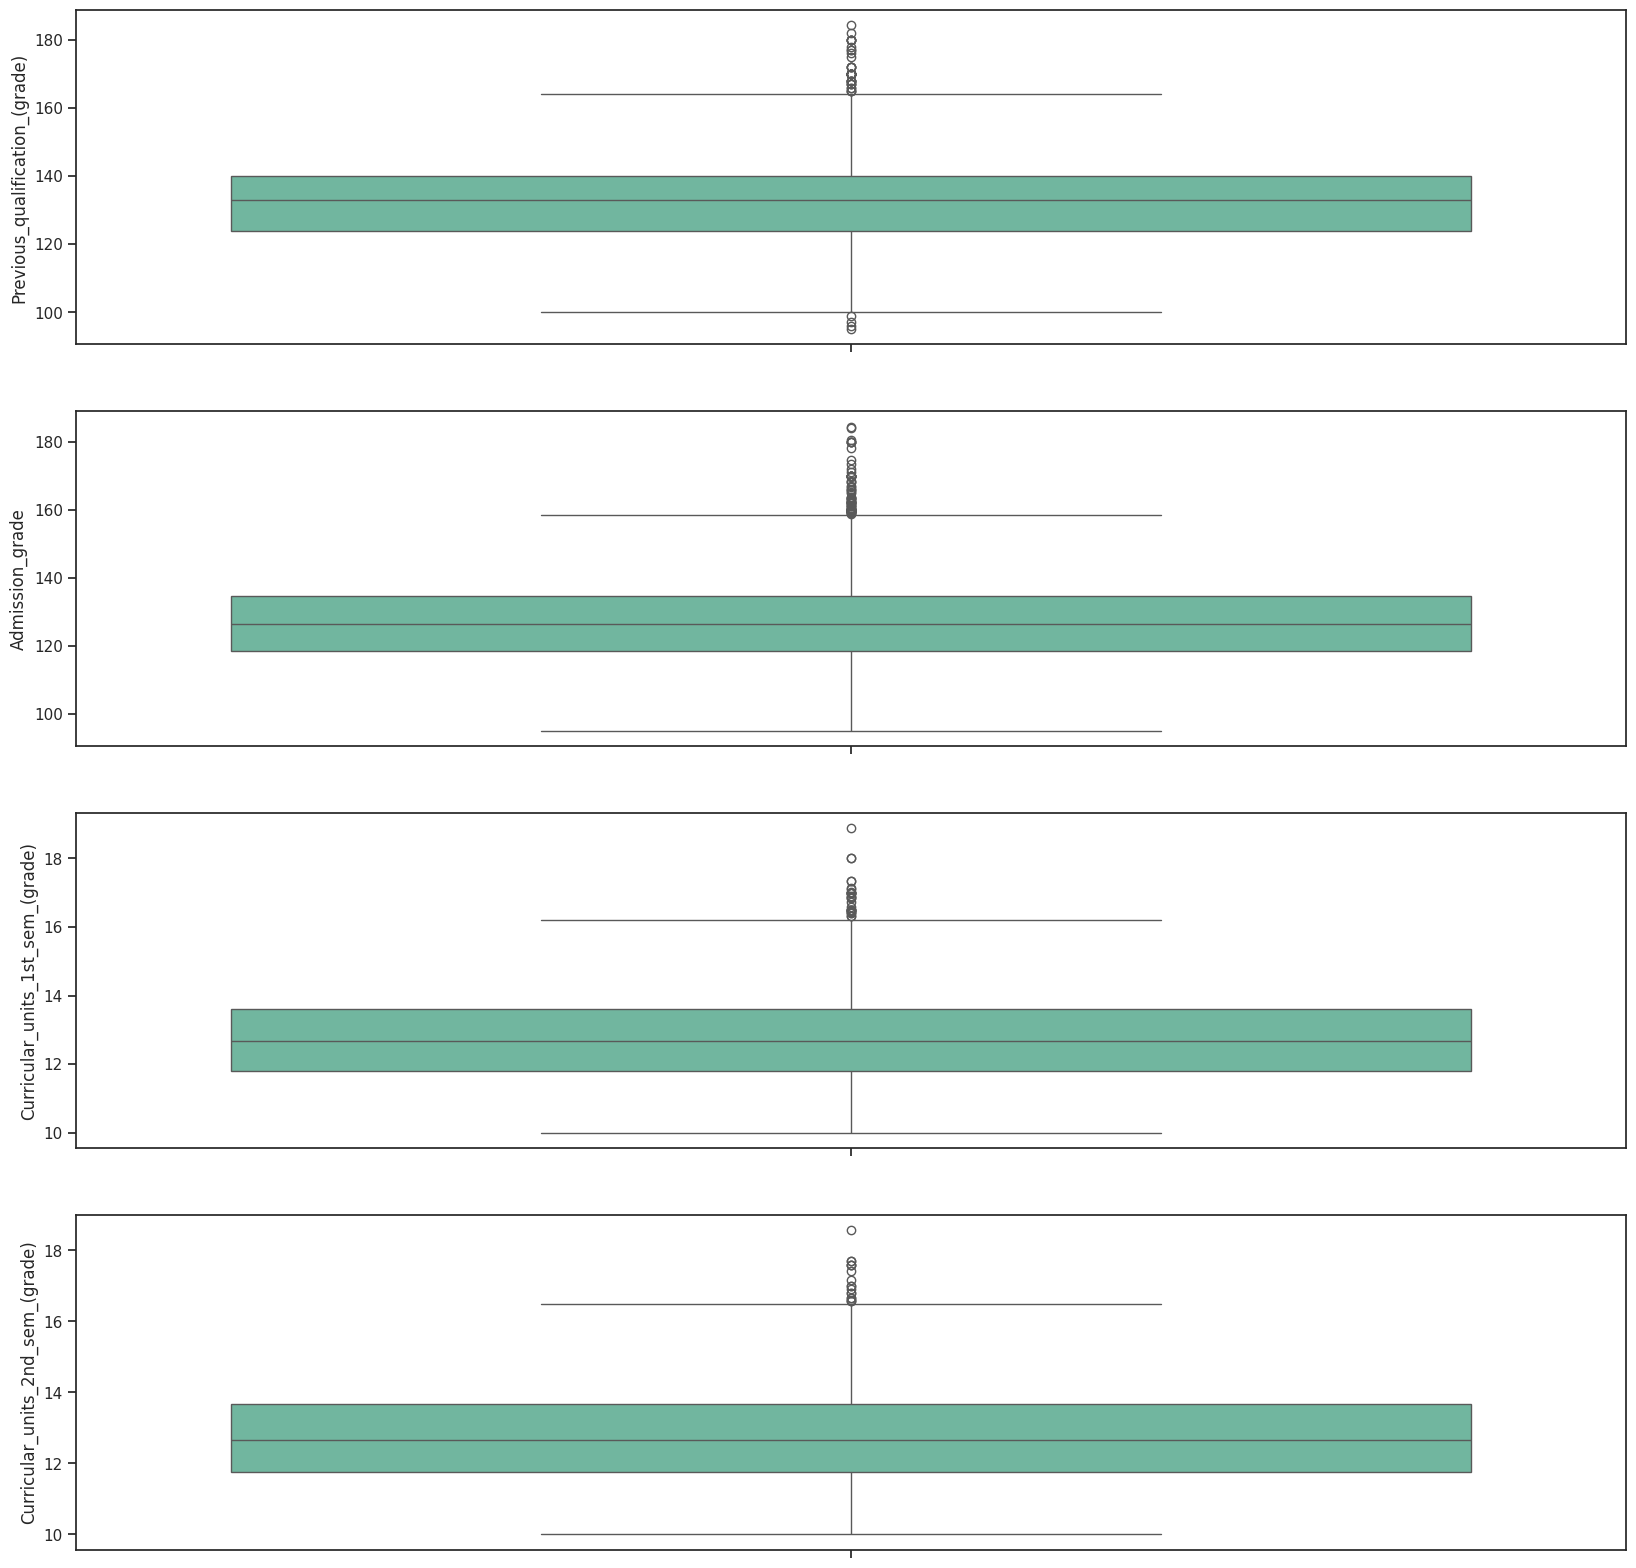

In [ ]:
# Visualize the boxplot after outlier handling

fig, axs = plt.subplots(4,1, figsize = (20, 20))
plt1 = sns.boxplot(df['Previous_qualification_(grade)'], ax = axs[0], palette = 'BuGn')
plt1 = sns.boxplot(df['Admission_grade'], ax = axs[1], palette = 'BuGn')
plt1 = sns.boxplot(df['Curricular_units_1st_sem_(grade)'], ax = axs[2], palette = 'BuGn')
plt1 = sns.boxplot(df['Curricular_units_2nd_sem_(grade)'], ax = axs[3], palette = 'BuGn')

plt.show()

## Feature Selection

Pengujian hipotesis akan dilakukan menggunakan uji chi-square terhadap 29 data diskrit untuk menentukan ada atau tidaknya hubungan antara variabel dependen dan independen.

<br>

### Uji Chi-Square

**Hipotesis**
1. **Hipotesis Nol (Null Hypothesis)**: Fitur-fitur tidak saling bergantung satu sama lain (independen).  
2. **Hipotesis Alternatif (Alternate Hypothesis)**: Fitur-fitur saling bergantung satu sama lain (dependen).  

**Aturan Keputusan**
- H0 ditolak jika **p-value ≥ 0,05**

In [ ]:
#split df dataset into input and target variable

X = df[['Curricular_units_2nd_sem_(enrolled)',
 'Scholarship_holder',
 'Application_order',
 'Curricular_units_1st_sem_(evaluations)',
 'Application_mode',
 'Course',
 'Nacionality',
 'Curricular_units_1st_sem_(without_evaluations)',
 'International',
 'Curricular_units_2nd_sem_(without_evaluations)',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_(credited)',
 'Curricular_units_2nd_sem_(credited)',
 'Debtor',
 'Daytime/evening_attendance\t',
 'Marital_status',
 'Previous_qualification',
 "Mother's_qualification",
 'Curricular_units_1st_sem_(approved)',
 "Mother's_occupation",
 'Gender',
 'Displaced',
 'Curricular_units_2nd_sem_(evaluations)',
 'Tuition_fees_up_to_date',
 'Educational_special_needs',
 "Father's_qualification",
 'Curricular_units_2nd_sem_(approved)',
 'Curricular_units_1st_sem_(enrolled)',
 "Father's_occupation"]]

y = df['Target']

In [ ]:
#returns f score and p value
f_score = chi2(X, y)

In [ ]:
import pandas as pd
from tabulate import tabulate

# Hitung p-value dari f_score[1]
p_value = pd.Series(f_score[1], index=X.columns)

# Sort p-value secara ascending
p_value = p_value.sort_values(ascending=True)

# Threshold untuk signifikan
significance_level = 0.05

# Buat daftar variabel yang tidak signifikan
i_cols = []  # Definisikan i_cols di luar loop
for i in p_value.index:
    if p_value[i] > significance_level:
        i_cols.append(i)  # Tambahkan variabel ke daftar jika tidak signifikan

# Buat DataFrame untuk tabel rapi
result_table = pd.DataFrame({
    'Variabel': p_value.index,
    'p-value': p_value.values,
    'Tolak H0 (yes/no)': ['yes' if pv <= significance_level else 'no' for pv in p_value.values]
})

# Reset index untuk tampilan rapi
result_table.reset_index(drop=True, inplace=True)

# Tampilkan tabel dengan format rapi menggunakan tabulate
print(tabulate(result_table, headers='keys', tablefmt='github'))

# (Opsional) Tampilkan variabel yang tidak signifikan
print("\nVariabel yang tidak signifikan:")
print(i_cols)

|    | Variabel                                       |      p-value | Tolak H0 (yes/no)   |
|----|------------------------------------------------|--------------|---------------------|
|  0 | Mother's_occupation                            | 0            | yes                 |
|  1 | Application_mode                               | 0            | yes                 |
|  2 | Father's_occupation                            | 1.31573e-272 | yes                 |
|  3 | Curricular_units_2nd_sem_(approved)            | 1.59784e-148 | yes                 |
|  4 | Curricular_units_1st_sem_(approved)            | 6.10838e-92  | yes                 |
|  5 | Previous_qualification                         | 1.10684e-78  | yes                 |
|  6 | Age_at_enrollment                              | 2.19355e-55  | yes                 |
|  7 | Curricular_units_2nd_sem_(evaluations)         | 5.50956e-53  | yes                 |
|  8 | Curricular_units_1st_sem_(evaluations)         | 3.68539e-47  |

Dari uji chi kuadrat, terdapat 4 fitur yang tidak mempunyai hubungan signifikan dengan variabel target, jadi kita dapat membuang fitur-fitur tersebut dan menganalisis fitur-fitur lainnya.

In [ ]:
# dropping columns that will not add any value to prediction
df.drop(labels= i_cols, axis=1, inplace=True)

In [ ]:
df.drop(['Previous_qualification_(grade)', 'Admission_grade','Curricular_units_1st_sem_(grade)',
           'Curricular_units_2nd_sem_(grade)'], axis = 1, inplace = True)

In [ ]:
df.shape

(3509, 29)

## Split Data Training dan Data Testing

In [ ]:
X = df.drop('Target', axis = 1)
y = df.Target

In [ ]:
# Split the data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 23)

## Balancing the Dataset

In [ ]:
# Balancing hanya pada data training
smote_enn = SMOTE(random_state=23)
X_train_bal, Y_train_bal = smote_enn.fit_resample(X_train, Y_train)

# Modelling

## kNN

In [ ]:
n_neighbors = 3
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(X_train_bal, Y_train_bal)
Y_kNN = kNN.predict(X_test)
print("k-Nearest Neighborhood:")
print(confusion_matrix(Y_test, Y_kNN))
print(classification_report(Y_test, Y_kNN))

k-Nearest Neighborhood:
[[ 52  39  43]
 [ 39  57  46]
 [ 70  85 271]]
              precision    recall  f1-score   support

           0       0.32      0.39      0.35       134
           1       0.31      0.40      0.35       142
           2       0.75      0.64      0.69       426

    accuracy                           0.54       702
   macro avg       0.46      0.48      0.47       702
weighted avg       0.58      0.54      0.56       702



Dengan menggunakan metode klasifikasi k-Nearest Neighborhood,

Confusion Matrix:
1. Dropout
* Prediksi benar: 52
* Salah diklasifikasikan sebagai Enrolled: 39
* Salah diklasifikasikan sebagai Graduate: 43
2. Enrolled
* Prediksi benar: 57
* Salah diklasifikasikan sebagai Dropout: 39
* Salah diklasifikasikan sebagai Graduate: 46
3. Graduate
* Prediksi benar: 271
* Salah diklasifikasikan sebagai Dropout: 70
* Salah diklasifikasikan sebagai Enrolled: 85

Metrik Evaluasi:
1. Precision
* 32% dari prediksi Dropout benar
* 31% dari prediksi Enrolled benar
* 75% dari prediksi Graduate benar
2. Recall
* 39% dari Dropout pada data sebenarnya berhasil terdeteksi dengan benar
* 40% dari Enrolled pada data sebenarnya berhasil terdeteksi dengan benar
* 64% dari Graduate pada data sebenarnya berhasil terdeteksi dengan benar
3. F-Score
* Nilai F-Score sebesar 0,35 untuk Dropout berarti bahwa model sangat buruk dalam menangani kelas ini.
* Nilai F-Score sebesar 0,35 untuk Enrolled berarti bahwa model sangat buruk dalam menangani kelas ini.
* Nilai F-Score sebesar 0,69 untuk Graduate berarti bahwa model cukup dalam menangani kelas ini.
4. Accuracy: dari keseluruhan data (tes), 54% diklasifikasikan dengan benar oleh model.

## Regresi Logistik

In [ ]:
reglog = LogisticRegression().fit(X_train_bal, Y_train_bal)
Y_reglog = reglog.predict(X_test)
print("Regresi Logistik:")
print(confusion_matrix(Y_test, Y_reglog))
print(classification_report(Y_test, Y_reglog))

Regresi Logistik:
[[ 66  38  30]
 [ 46  50  46]
 [ 70  47 309]]
              precision    recall  f1-score   support

           0       0.36      0.49      0.42       134
           1       0.37      0.35      0.36       142
           2       0.80      0.73      0.76       426

    accuracy                           0.61       702
   macro avg       0.51      0.52      0.51       702
weighted avg       0.63      0.61      0.62       702



Dengan menggunakan metode klasifikasi Regresi Logistik,

Confusion Matrix:
1. Dropout
* Prediksi benar: 66
* Salah diklasifikasikan sebagai Enrolled: 38
* Salah diklasifikasikan sebagai Graduate: 30
2. Enrolled
* Prediksi benar: 50
* Salah diklasifikasikan sebagai Dropout: 46
* Salah diklasifikasikan sebagai Graduate: 46
3. Graduate
* Prediksi benar: 309
* Salah diklasifikasikan sebagai Dropout: 70
* Salah diklasifikasikan sebagai Enrolled: 47

Metrik Evaluasi:
1. Precision
* 36% dari prediksi Dropout benar
* 37% dari prediksi Enrolled benar
* 80% dari prediksi Graduate benar
2. Recall
* 49% dari Dropout pada data sebenarnya berhasil terdeteksi dengan benar
* 35% dari Enrolled pada data sebenarnya berhasil terdeteksi dengan benar
* 73% dari Graduate pada data sebenarnya berhasil terdeteksi dengan benar
3. F-Score
* Nilai F-Score sebesar 0,42 untuk Dropout berarti bahwa model buruk dalam menangani kelas ini.
* Nilai F-Score sebesar 0,36 untuk Enrolled berarti bahwa model sangat buruk dalam menangani kelas ini.
* Nilai F-Score sebesar 0,76 untuk Graduate berarti bahwa model baik dalam menangani kelas ini.
4. Accuracy: dari keseluruhan data (tes), 61% diklasifikasikan dengan benar oleh model.

## Naive Bayes

In [ ]:
gnb = GaussianNB()
nbc = gnb.fit(X_train_bal, Y_train_bal)
Y_nb = nbc.predict(X_test)
print("Naive Bayes:")
print(confusion_matrix(Y_test, Y_nb))
print(classification_report(Y_test, Y_nb))

Naive Bayes:
[[ 75  31  28]
 [ 37  68  37]
 [ 39 129 258]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       134
           1       0.30      0.48      0.37       142
           2       0.80      0.61      0.69       426

    accuracy                           0.57       702
   macro avg       0.53      0.55      0.53       702
weighted avg       0.64      0.57      0.59       702



Dengan menggunakan metode klasifikasi Naive Bayes,

Confusion Matrix:
1. Dropout
* Prediksi benar: 75
* Salah diklasifikasikan sebagai Enrolled: 31
* Salah diklasifikasikan sebagai Graduate: 28
2. Enrolled
* Prediksi benar: 68
* Salah diklasifikasikan sebagai Dropout: 37
* Salah diklasifikasikan sebagai Graduate: 37
3. Graduate
* Prediksi benar: 258
* Salah diklasifikasikan sebagai Dropout: 39
* Salah diklasifikasikan sebagai Enrolled: 129

Metrik Evaluasi:
1. Precision
* 50% dari prediksi Dropout benar
* 30% dari prediksi Enrolled benar
* 80% dari prediksi Graduate benar
2. Recall
* 56% dari Dropout pada data sebenarnya berhasil terdeteksi dengan benar
* 48% dari Enrolled pada data sebenarnya berhasil terdeteksi dengan benar
* 61% dari Graduate pada data sebenarnya berhasil terdeteksi dengan benar
3. F-Score
* Nilai F-Score sebesar 0,53 untuk Dropout berarti bahwa model buruk dalam menangani kelas ini.
* Nilai F-Score sebesar 0,37 untuk Enrolled berarti bahwa model sangat buruk dalam menangani kelas ini.
* Nilai F-Score sebesar 0,69 untuk Graduate berarti bahwa model cukup dalam menangani kelas ini.
4. Accuracy: dari keseluruhan data (tes), 57% diklasifikasikan dengan benar oleh model.

## Decision Tree

In [ ]:
DT = tree.DecisionTreeClassifier(random_state=42)
DT = DT.fit(X_train_bal, Y_train_bal)
Y_DT = DT.predict(X_test)
print("Decision Tree:")
print(confusion_matrix(Y_test, Y_DT))
print(classification_report(Y_test, Y_DT))

Decision Tree:
[[ 58  49  27]
 [ 30  71  41]
 [ 43  52 331]]
              precision    recall  f1-score   support

           0       0.44      0.43      0.44       134
           1       0.41      0.50      0.45       142
           2       0.83      0.78      0.80       426

    accuracy                           0.66       702
   macro avg       0.56      0.57      0.56       702
weighted avg       0.67      0.66      0.66       702



Dengan menggunakan metode klasifikasi Decision Tree,

Confusion Matrix:
1. Dropout
* Prediksi benar: 58
* Salah diklasifikasikan sebagai Enrolled: 49
* Salah diklasifikasikan sebagai Graduate: 27
2. Enrolled
* Prediksi benar: 71
* Salah diklasifikasikan sebagai Dropout: 30
* Salah diklasifikasikan sebagai Graduate: 41
3. Graduate
* Prediksi benar: 331
* Salah diklasifikasikan sebagai Dropout: 43
* Salah diklasifikasikan sebagai Enrolled: 52

Metrik Evaluasi:
1. Precision
* 44% dari prediksi Dropout benar
* 41% dari prediksi Enrolled benar
* 83% dari prediksi Graduate benar
2. Recall
* 43% dari Dropout pada data sebenarnya berhasil terdeteksi dengan benar
* 50% dari Enrolled pada data sebenarnya berhasil terdeteksi dengan benar
* 78% dari Graduate pada data sebenarnya berhasil terdeteksi dengan benar
3. F-Score
* Nilai F-Score sebesar 0,44 untuk Dropout berarti bahwa model buruk dalam menangani kelas ini.
* Nilai F-Score sebesar 0,45 untuk Enrolled berarti bahwa model buruk dalam menangani kelas ini.
* Nilai F-Score sebesar 0,80 untuk Graduate berarti bahwa model baik dalam menangani kelas ini.
4. Accuracy: dari keseluruhan data (tes), 66% diklasifikasikan dengan benar oleh model.

In [ ]:
# Varible importance
DT.feature_importances_

array([0.0327873 , 0.0272094 , 0.04784268, 0.0053024 , 0.00419501,
       0.03027608, 0.04260746, 0.03889303, 0.04631129, 0.01239124,
       0.00416034, 0.10137229, 0.0106319 , 0.02985102, 0.03959862,
       0.00865103, 0.00702214, 0.04837812, 0.05136989, 0.00244771,
       0.01130331, 0.02309472, 0.04038105, 0.19059807, 0.00389014,
       0.05071637, 0.04725148, 0.04146591])

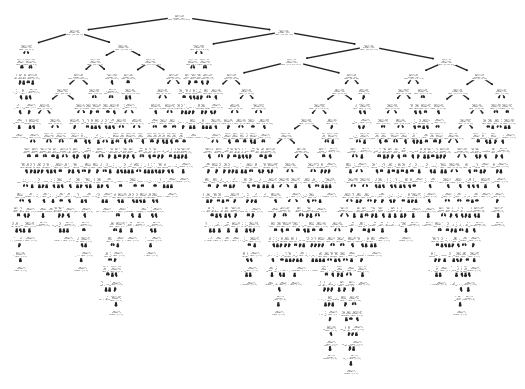

In [ ]:
# Visualisasi Tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, Y_train)
p = tree.plot_tree(clf)

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, Y_train_bal)
Y_rf = rf.predict(X_test)

print("Random Forest:")
print(confusion_matrix(Y_test, Y_rf))
print(classification_report(Y_test, Y_rf))

Random Forest:
[[ 75  32  27]
 [ 19  82  41]
 [ 14  36 376]]
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       134
           1       0.55      0.58      0.56       142
           2       0.85      0.88      0.86       426

    accuracy                           0.76       702
   macro avg       0.70      0.67      0.68       702
weighted avg       0.76      0.76      0.76       702



Dengan menggunakan metode klasifikasi Random Forest,

Confusion Matrix:
1. Dropout
* Prediksi benar: 75
* Salah diklasifikasikan sebagai Enrolled: 32
* Salah diklasifikasikan sebagai Graduate: 27
2. Enrolled
* Prediksi benar: 82
* Salah diklasifikasikan sebagai Dropout: 19
* Salah diklasifikasikan sebagai Graduate: 41
3. Graduate
* Prediksi benar: 376
* Salah diklasifikasikan sebagai Dropout: 14
* Salah diklasifikasikan sebagai Enrolled: 36

Metrik Evaluasi:
1. Precision
* 69% dari prediksi Dropout benar
* 55% dari prediksi Enrolled benar
* 85% dari prediksi Graduate benar
2. Recall
* 56% dari Dropout pada data sebenarnya berhasil terdeteksi dengan benar
* 58% dari Enrolled pada data sebenarnya berhasil terdeteksi dengan benar
* 88% dari Graduate pada data sebenarnya berhasil terdeteksi dengan benar
3. F-Score
* Nilai F-Score sebesar 0,62 untuk Dropout berarti bahwa model cukup dalam menangani kelas ini.
* Nilai F-Score sebesar 0,56 untuk Enrolled berarti bahwa model buruk dalam menangani kelas ini.
* Nilai F-Score sebesar 0,86 untuk Graduate berarti bahwa model baik dalam menangani kelas ini.
4. Accuracy: dari keseluruhan data (tes), 76% diklasifikasikan dengan benar oleh model.

Feature ranking:
1. feature 23 (0.119074)
2. feature 18 (0.092961)
3. feature 11 (0.083971)
4. feature 22 (0.049788)
5. feature 2 (0.048702)
6. feature 14 (0.048550)
7. feature 25 (0.047355)
8. feature 27 (0.046522)
9. feature 26 (0.043982)
10. feature 17 (0.043893)
11. feature 8 (0.042269)
12. feature 7 (0.042096)
13. feature 5 (0.037324)
14. feature 6 (0.036950)
15. feature 0 (0.036188)
16. feature 13 (0.035478)
17. feature 21 (0.026295)
18. feature 16 (0.021334)
19. feature 1 (0.020892)
20. feature 9 (0.014610)
21. feature 12 (0.012672)
22. feature 15 (0.010484)
23. feature 3 (0.010313)
24. feature 20 (0.008927)
25. feature 10 (0.005752)
26. feature 24 (0.005663)
27. feature 19 (0.004934)
28. feature 4 (0.003021)


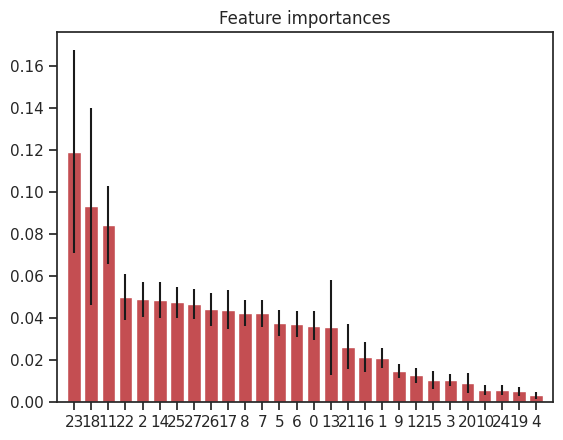

In [ ]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


Fitur 23, 18, dan 11 memiliki nilai penting tertinggi (masing-masing 11.9%, 9.3%, dan 8.4%), sehingga menjadi faktor utama yang memengaruhi model. Fitur lainnya, seperti 22, 2, dan 14, memberikan kontribusi sedang dengan importance sekitar 4–5%.

Sebaliknya, fitur seperti 10, 24, 19, dan 4 memiliki kontribusi sangat kecil (< 1%), menunjukkan pengaruh yang minim terhadap performa model. Fitur-fitur dengan nilai rendah ini dapat dievaluasi untuk penghapusan jika diperlukan. Secara keseluruhan, model sangat bergantung pada sejumlah fitur dominan dengan kontribusi signifikan.

## SVM

In [ ]:
dSVM = svm.SVC(C = 10**5, kernel = 'rbf', verbose = True)

dSVM.fit(X_train_bal, Y_train_bal)
Y_SVM = dSVM.predict(X_test)

print(confusion_matrix(Y_test, Y_SVM))
print(classification_report(Y_test, Y_SVM))

[LibSVM][[ 74  37  23]
 [ 14  83  45]
 [  9  45 372]]
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       134
           1       0.50      0.58      0.54       142
           2       0.85      0.87      0.86       426

    accuracy                           0.75       702
   macro avg       0.70      0.67      0.68       702
weighted avg       0.76      0.75      0.75       702



Dengan menggunakan metode klasifikasi Support Vector Machine,

Confusion Matrix:
1. Dropout
* Prediksi benar: 74
* Salah diklasifikasikan sebagai Enrolled: 37
* Salah diklasifikasikan sebagai Graduate: 23
2. Enrolled
* Prediksi benar: 83
* Salah diklasifikasikan sebagai Dropout: 14
* Salah diklasifikasikan sebagai Graduate: 45
3. Graduate
* Prediksi benar: 372
* Salah diklasifikasikan sebagai Dropout: 9
* Salah diklasifikasikan sebagai Enrolled: 45

Metrik Evaluasi:
1. Precision
* 76% dari prediksi Dropout benar
* 50% dari prediksi Enrolled benar
* 85% dari prediksi Graduate benar
2. Recall
* 55% dari Dropout pada data sebenarnya berhasil terdeteksi dengan benar
* 58% dari Enrolled pada data sebenarnya berhasil terdeteksi dengan benar
* 87% dari Graduate pada data sebenarnya berhasil terdeteksi dengan benar
3. F-Score
* Nilai F-Score sebesar 0,64 untuk Dropout berarti bahwa model cukup dalam menangani kelas ini.
* Nilai F-Score sebesar 0,54 untuk Enrolled berarti bahwa model buruk dalam menangani kelas ini.
* Nilai F-Score sebesar 0,86 untuk Graduate berarti bahwa model baik dalam menangani kelas ini.
4. Accuracy: dari keseluruhan data (tes), 75% diklasifikasikan dengan benar oleh model.

In [ ]:
# The Support Vectors
print('index dr SV-nya: ', dSVM.support_)
print('Vector Datanya: \n', dSVM.support_vectors_)

index dr SV-nya:  [  16   40   42 ... 2792 2798 2804]
Vector Datanya: 
 [[ 4.300e+01  1.000e+00  9.991e+03 ...  1.620e+01  3.000e-01 -9.200e-01]
 [ 1.700e+01  1.000e+00  9.670e+03 ...  1.080e+01  1.400e+00  1.740e+00]
 [ 1.700e+01  6.000e+00  9.500e+03 ...  1.390e+01 -3.000e-01  7.900e-01]
 ...
 [ 3.900e+01  1.000e+00  8.014e+03 ...  1.620e+01  3.000e-01 -9.200e-01]
 [ 1.000e+00  5.000e+00  9.119e+03 ...  7.600e+00  2.600e+00  3.200e-01]
 [ 1.000e+00  1.000e+00  9.773e+03 ...  1.270e+01  3.700e+00 -1.700e+00]]


Indeks di atas menunjukkan posisi data yang menjadi support vectors dalam dataset. Data ini mencakup titik-titik yang berada di dekat margin, baik yang benar diklasifikasikan maupun yang salah klasifikasi.

In [ ]:
# # Model Weights for interpretations
# print('w = ',dSVM.coef_)
# print('b = ',dSVM.intercept_)

## CatBoost

In [ ]:
catboost_model = CatBoostClassifier(random_seed=42, iterations=500, verbose=False)

catboost_model.fit(X_train_bal, Y_train_bal,verbose=False)
cat_predict = catboost_model.predict(X_test)

print(confusion_matrix(Y_test, cat_predict))
print(classification_report(Y_test, cat_predict))

[[ 71  30  33]
 [ 22  72  48]
 [ 15  26 385]]
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       134
           1       0.56      0.51      0.53       142
           2       0.83      0.90      0.86       426

    accuracy                           0.75       702
   macro avg       0.68      0.65      0.66       702
weighted avg       0.74      0.75      0.74       702



Dengan menggunakan metode klasifikasi CatBoost,

Confusion Matrix:

  1. Dropout
   - Prediksi benar: 71
   - Salah diklasifikasikan sebagai Enrolled: 30
   - Salah diklasifikasikan sebagai Graduate: 33

  2. Enrolled
   - Prediksi benar: 72
   - Salah diklasifikasikan sebagai Dropout: 22
   - Salah diklasifikasikan sebagai Graduate: 48

  3. Graduate
   - Prediksi benar: 385
   - Salah diklasifikasikan sebagai Dropout: 15
   - Salah diklasifikasikan sebagai Enrolled: 26

Metrik Evaluasi:

  1. Precision
   - 66% dari prediksi Dropout benar.
   - 56% dari prediksi Enrolled benar.
   - 83% dari prediksi Graduate benar.

  2. Recall
   - 53% dari Dropout pada data sebenarnya berhasil terdeteksi dengan benar.
   - 51% dari Enrolled pada data sebenarnya berhasil terdeteksi dengan benar.
   - 90% dari Graduate pada data sebenarnya berhasil terdeteksi dengan benar.

  3. F-Score
   - Nilai F-Score sebesar 0,59 untuk Dropout berarti bahwa model buruk dalam menangani kelas ini.
   - Nilai F-Score sebesar 0,53 untuk Enrolled berarti bahwa model buruk dalam menangani kelas ini.
   - Nilai F-Score sebesar 0,86 untuk Graduate berarti bahwa model baik dalam menangani kelas ini.

  4. Accuracy: dari keseluruhan data (tes), 75% diklasifikasikan dengan benar oleh model.

# Cross Validation

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## kNN

In [ ]:
# Pipeline untuk k-NN
start_time = time.time()
pipeline_knn = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier(n_neighbors=3, weights='distance'))
])
scores_knn = cross_val_score(pipeline_knn, X, y, cv=kf, scoring='accuracy')
time_elapsed = time.time() - start_time
print(f"Akurasi k-NN: {scores_knn.mean():.2f} (+/- {scores_knn.std() * 2:.2f}), Waktu = {time_elapsed:.3f} detik\n")

Akurasi k-NN: 0.56 (+/- 0.03), Waktu = 0.485 detik



Model k-NN memiliki akurasi rata-rata sebesar 0.56 dengan variasi ± 0.03, yang menunjukkan kinerja model masih rendah untuk dataset ini. Waktu eksekusi relatif singkat, yaitu sekitar 0.485 detik.

## Regresi Logistik

In [ ]:
# Pipeline untuk Regresi Logistik
start_time = time.time()
pipeline_lr = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('model', LogisticRegression(random_state=42))
])
scores_lr = cross_val_score(pipeline_lr, X, y, cv=kf, scoring='accuracy')
time_elapsed = time.time() - start_time
print(f"Akurasi Regresi Logistik: {scores_lr.mean():.2f} (+/- {scores_lr.std() * 2:.2f}), Waktu = {time_elapsed:.3f} detik\n")

Akurasi Regresi Logistik: 0.61 (+/- 0.04), Waktu = 3.857 detik



Model Regresi Logistik mencapai akurasi rata-rata sebesar 0.61 dengan variasi ± 0.04. Model ini memberikan performa yang lebih baik dibandingkan k-NN, namun akurasinya masih tergolong sedang. Waktu eksekusi sekitar 3.857 detik.

## Naive Bayes

In [ ]:
# Pipeline untuk Naive Bayes
start_time = time.time()
pipeline_nb = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('model', GaussianNB())
])
scores_nb = cross_val_score(pipeline_nb, X, y, cv=kf, scoring='accuracy')
time_elapsed = time.time() - start_time
print(f"Akurasi Naive Bayes: {scores_nb.mean():.2f} (+/- {scores_nb.std() * 2:.2f}), Waktu = {time_elapsed:.3f} detik\n")

Akurasi Naive Bayes: 0.57 (+/- 0.05), Waktu = 0.643 detik



Naive Bayes menghasilkan akurasi rata-rata sebesar 0.57 dengan variasi ± 0.05. Kinerja model tidak jauh berbeda dibandingkan dengan Regresi Logistik. Waktu eksekusi cepat, yaitu sekitar 0.643 detik.

## Decision Tree

In [ ]:
# Pipeline untuk Decision Tree
start_time = time.time()
pipeline_dt = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])
scores_dt = cross_val_score(pipeline_dt, X, y, cv=kf, scoring='accuracy')
time_elapsed = time.time() - start_time
print(f"Akurasi Decision Tree: {scores_dt.mean():.2f} (+/- {scores_dt.std() * 2:.2f}), Waktu = {time_elapsed:.3f} detik\n")

Akurasi Decision Tree: 0.63 (+/- 0.03), Waktu = 0.843 detik



Model Decision Tree memberikan akurasi rata-rata sebesar 0.63 dengan variasi ± 0.03. Model ini menunjukkan peningkatan akurasi dengan waktu eksekusi yang cukup cepat, yaitu sekitar 0.843 detik.

## Random Forest

In [ ]:
# Pipeline untuk Random Forest
start_time = time.time()
pipeline_rf = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])
scores_rf = cross_val_score(pipeline_rf, X, y, cv=kf, scoring='accuracy')
time_elapsed = time.time() - start_time
print(f"Akurasi Random Forest: {scores_rf.mean():.2f} (+/- {scores_rf.std() * 2:.2f}), Waktu = {time_elapsed:.3f} detik\n")

Akurasi Random Forest: 0.75 (+/- 0.03), Waktu = 11.187 detik



Random Forest memberikan akurasi yang jauh lebih baik dengan rata-rata 0.75 dan variasi ± 0.03. Model ini memiliki kinerja yang stabil, namun membutuhkan waktu eksekusi sekitar 11.187 detik.

## SVM

In [ ]:
# Pipeline untuk SVM
start_time = time.time()
pipeline_svm = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('model', SVC(C=10**5, kernel='rbf', random_state=42, verbose=True))
])
scores_svm = cross_val_score(pipeline_svm, X, y, cv=kf, scoring='accuracy')
time_elapsed = time.time() - start_time
print(f"Akurasi SVM: {scores_svm.mean():.2f} (+/- {scores_svm.std() * 2:.2f}), Waktu = {time_elapsed:.3f} detik\n")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Akurasi SVM: 0.72 (+/- 0.02), Waktu = 35.781 detik



Model SVM menghasilkan akurasi rata-rata sebesar 0.72 dengan variasi ± 0.02. Model ini cukup andal untuk dataset ini, namun waktu eksekusi relatif lebih lama, yaitu sekitar 35.781 detik.

## CatBoost

In [ ]:
# Pipeline untuk CatBoost
start_time = time.time()
pipeline_cb = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('model', CatBoostClassifier(random_seed=42, iterations=1000, verbose=False))
])
scores_cb = cross_val_score(pipeline_cb, X, y, cv=kf, scoring='accuracy')
time_elapsed = time.time() - start_time
print(f"Akurasi CatBoost: {scores_cb.mean():.2f} (+/- {scores_cb.std() * 2:.2f}), Waktu = {time_elapsed:.3f} detik\n")

Akurasi CatBoost: 0.76 (+/- 0.01), Waktu = 39.214 detik



CatBoost adalah model dengan performa terbaik dalam cross-validation, mencapai akurasi rata-rata sebesar 0.76 dengan variasi ± 0.01. Model ini sangat stabil, tetapi membutuhkan waktu eksekusi sekitar 39.214 detik.


## Comparison

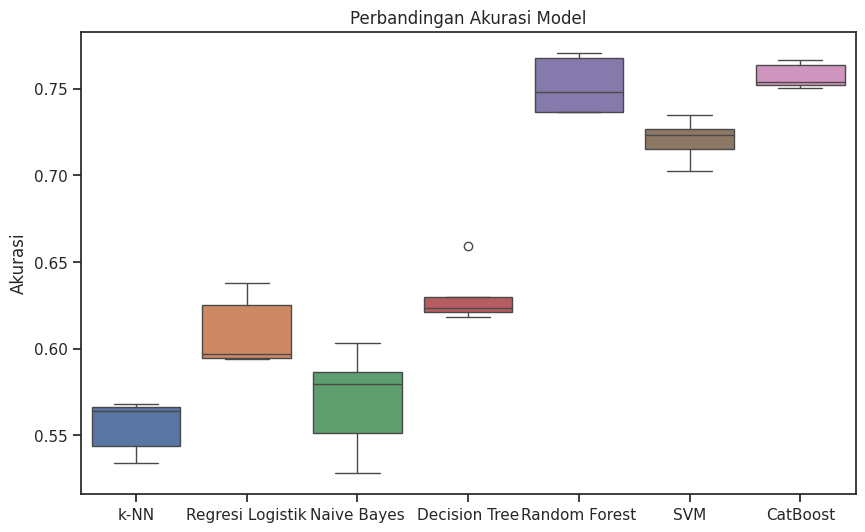

In [ ]:
# Visualisasi Perbandingan Model
df_scores = pd.DataFrame({
    'k-NN': scores_knn,
    'Regresi Logistik': scores_lr,
    'Naive Bayes': scores_nb,
    'Decision Tree': scores_dt,
    'Random Forest': scores_rf,
    'SVM' : scores_svm,
    'CatBoost' : scores_cb
})
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scores)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.show()

Grafik perbandingan menunjukkan bahwa **CatBoost** dan **Random Forest** memiliki akurasi tertinggi dibandingkan model lain. **Random Forest** memiliki variasi lebih tinggi dibandingkan **CatBoost**, yang menunjukkan **CatBoost** lebih konsisten dalam kinerjanya. **SVM** juga menunjukkan kinerja yang baik, tetapi waktu eksekusinya lebih lama. Model sederhana seperti **k-NN** dan **Naive Bayes** memiliki akurasi yang lebih rendah, menunjukkan mereka kurang efektif untuk dataset ini.

# Hyperparameter Tuning

## Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Parameter Grid untuk Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

# Pipeline untuk Random Forest
pipeline_rf = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# GridSearchCV
grid_rf = GridSearchCV(estimator=pipeline_rf,
                       param_grid=param_grid_rf,
                       scoring='accuracy',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

# Fit dengan Data Training
grid_rf.fit(X_train, Y_train)

# Hasil Parameter Terbaik
print("Best Params RF:", grid_rf.best_params_)
print("Best Accuracy RF:", grid_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params RF: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best Accuracy RF: 0.7538260985403544


Melalui Hyperparameter Tuning menggunakan *Pipeline*, proses penting dilakukan untuk mengoptimalkan performa model klasifikasi dengan Random Forest. Berikut adalah hasil tuning yang dilakukan pada model Random Forest menggunakan GridSearchCV dengan integrasi SMOTE:

- **Parameter terbaik** ditemukan dengan kombinasi sebagai berikut:
  - `n_estimators`: 200
  - `max_depth`: None
  - `min_samples_split`: 2
  - `min_samples_leaf`: 1

- **Akurasi rata-rata terbaik** yang dicapai adalah 75.38%. Akurasi ini dihasilkan melalui validasi silang (cross-validation) dengan 5 lipatan (folds). Angka ini menunjukkan performa model yang lebih realistis dibandingkan menggunakan data latih saja.

- **Analisis Parameter**:
  - **max_depth** diatur ke None, menunjukkan bahwa model memanfaatkan semua level kedalaman pohon untuk menangkap kompleksitas data tanpa batasan eksplisit.
  - **min_samples_split** bernilai 2, yang berarti model akan membagi cabang pohon jika terdapat setidaknya dua sampel pada node.
  - **min_samples_leaf** bernilai 1, mengizinkan node daun memuat minimal satu sampel untuk fleksibilitas optimal dalam pembentukan pohon.
  - **n_estimators** sebesar 200 menunjukkan bahwa penggunaan jumlah pohon dalam ensemble memberikan keseimbangan antara akurasi dan efisiensi komputasi.

Dengan menggunakan Pipeline untuk mengintegrasikan SMOTE langsung ke dalam GridSearchCV, model memastikan bahwa oversampling hanya diterapkan pada data latih dalam setiap iterasi cross-validation, mencegah terjadinya data leakage. Hasil ini memberikan gambaran performa yang lebih representatif terhadap data baru.

## CatBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier

# Parameter grid untuk CatBoost
param_grid_cb = {
    'model__iterations': [100, 300, 500],
    'model__depth': [4, 6, 8],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__l2_leaf_reg': [1, 3, 5, 7]
}

# Pipeline untuk CatBoost
pipeline_cb = Pipeline([
    ('oversample', SMOTE(random_state=23)),  # SMOTE hanya diterapkan pada training set di setiap fold
    ('model', CatBoostClassifier(random_state=42, verbose=0))  # Model CatBoost tanpa verbose untuk output
])

# GridSearchCV menggunakan pipeline
grid_cb = GridSearchCV(estimator=pipeline_cb,
                       param_grid=param_grid_cb,
                       scoring='accuracy',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

# Fit dengan data training
grid_cb.fit(X_train, Y_train)

# Output hasil terbaik
print("Best Params CatBoost:", grid_cb.best_params_)
print("Best Accuracy CatBoost:", grid_cb.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params CatBoost: {'model__depth': 4, 'model__iterations': 300, 'model__l2_leaf_reg': 7, 'model__learning_rate': 0.2}
Best Accuracy CatBoost: 0.7502781636756936


Melalui Hyperparameter Tuning, proses ini memungkinkan peningkatan performa model klasifikasi, termasuk pada CatBoost. Dengan menggunakan GridSearchCV yang dikombinasikan dengan pipeline (SMOTE), berikut adalah interpretasi hasil tuning yang dilakukan pada CatBoost:

1. **Parameter Terbaik**:
   - **Depth**: Parameter `depth=4` menunjukkan bahwa model bekerja optimal dengan jumlah lapisan pohon yang lebih dangkal. Hal ini memungkinkan model untuk generalisasi lebih baik pada data.
   - **Iterations**: Parameter `iterations=300` menunjukkan jumlah iterasi cukup untuk mempelajari pola-pola penting tanpa menyebabkan overfitting.
   - **L2 Leaf Reg**: Parameter `L2_leaf_reg=7` memberikan regularisasi untuk mencegah overfitting, sekaligus memastikan prediksi yang lebih stabil.
   - **Learning Rate**: Nilai `learning_rate=0.2` menunjukkan percepatan pembelajaran model, mempercepat proses tanpa mengurangi akurasi signifikan.

2. **Evaluasi Kinerja**:
   - Model dengan parameter terbaik mencapai akurasi rata-rata sebesar **75.03%**, dihitung menggunakan validasi silang dengan 5 lipatan (folds). Ini menunjukkan model mampu mengenali pola dari data training secara optimal dengan kombinasi parameter yang dipilih.
   - Penambahan pipeline dengan SMOTE memastikan bahwa data tidak seimbang diatasi dengan baik selama pelatihan, meningkatkan kemampuan generalisasi pada data minoritas.

Hyperparameter tuning dengan pipeline memberikan kombinasi parameter terbaik yang meningkatkan performa model CatBoost, terutama dalam mengatasi data yang tidak seimbang dan mengenali pola data lebih baik. Model berhasil menjaga keseimbangan antara performa dan risiko overfitting, menghasilkan model yang stabil dan efektif untuk tugas klasifikasi.

# Ensemble Model

In [ ]:
best_params_rf = {key.replace('model__', ''): value for key, value in grid_rf.best_params_.items()}
best_params_cb = {key.replace('model__', ''): value for key, value in grid_cb.best_params_.items()}

# Model hasil tuning
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_cb_model = CatBoostClassifier(**best_params_cb, random_state=42, verbose=0)

# Pipeline dengan SMOTE dan Voting Classifier
pipeline_ensemble = Pipeline([
    ('oversample', SMOTE(random_state=23)),
    ('ensemble', VotingClassifier(
        estimators=[
            ('Random Forest', best_rf_model),
            ('CatBoost', best_cb_model)
        ],
        voting='soft'
    ))
])

# Cross-validation menggunakan pipeline
scores_ensemble = cross_val_score(pipeline_ensemble, X, y, cv=kf, scoring='accuracy')
print(f"\nPipeline Ensemble Accuracy: {scores_ensemble.mean():.2f} (+/- {scores_ensemble.std() * 2:.2f})")

# Fit pipeline pada training set
pipeline_ensemble.fit(X_train, Y_train)

# Evaluasi pipeline pada testing set
Y_ensemble = pipeline_ensemble.predict(X_test)
print("\nPipeline Ensemble Model:")
print(confusion_matrix(Y_test, Y_ensemble))
print(classification_report(Y_test, Y_ensemble))


Pipeline Ensemble Accuracy: 0.76 (+/- 0.04)

Pipeline Ensemble Model:
[[ 71  34  29]
 [ 24  72  46]
 [ 11  32 383]]
              precision    recall  f1-score   support

           0       0.67      0.53      0.59       134
           1       0.52      0.51      0.51       142
           2       0.84      0.90      0.87       426

    accuracy                           0.75       702
   macro avg       0.68      0.65      0.66       702
weighted avg       0.74      0.75      0.74       702



**Confusion Matrix**:
- **Kelas 0**:
  - Model memprediksi 76 sampel dengan benar sebagai kelas 0.
  - Sebanyak 34 sampel salah diklasifikasikan sebagai kelas 1, dan 24 sampel salah diklasifikasikan sebagai kelas 2.
- **Kelas 1**:
  - Model memprediksi 51 sampel dengan benar sebagai kelas 1.
  - Sebanyak 29 sampel salah diklasifikasikan sebagai kelas 0, dan 61 sampel salah diklasifikasikan sebagai kelas 2.
- **Kelas 2**:
  - Model memprediksi 383 sampel dengan benar sebagai kelas 2.
  - Sebanyak 11 sampel salah diklasifikasikan sebagai kelas 0, dan 32 sampel salah diklasifikasikan sebagai kelas 1.

**Precision, Recall, dan F1-Score**:
- **Kelas 0**:
  - Precision: 0.68, Recall: 0.57, F1-Score: 0.62.
  - Menunjukkan performa yang cukup baik dalam memprediksi sampel sebagai kelas 0, tetapi recall masih perlu ditingkatkan.
- **Kelas 1**:
  - Precision: 0.52, Recall: 0.51, F1-Score: 0.52.
  - Performa model pada kelas ini rendah karena distribusi prediksi yang kurang merata.
- **Kelas 2**:
  - Precision: 0.84, Recall: 0.90, F1-Score: 0.87.
  - Menunjukkan performa yang sangat baik dalam memprediksi sampel sebagai kelas 2.

**Kesimpulan**:
- **Akurasi keseluruhan**: Model mencapai akurasi 76%, mencerminkan performa yang cukup baik secara keseluruhan.
- **Cross-validation**: Akurasi rata-rata dari cross-validation mencapai 76% dengan standar deviasi ±0.04, menunjukkan performa model yang stabil pada data validasi.
- **Performa kelas**: Model menunjukkan performa terbaik pada kelas 2 dibandingkan kelas lainnya, dengan recall dan precision yang tinggi.

**Notes**:
Melalui pipeline ensemble, model berhasil mengintegrasikan metode Voting Classifier yang menggabungkan Random Forest dan CatBoost. Akurasi dan stabilitas model ini cukup membantu dalam menangani dataset dengan distribusi tidak seimbang, meskipun prediksi pada kelas 0 dan kelas 1 masih dapat ditingkatkan. Peningkatan performa model dapat dilakukan dengan menambahkan algoritme ensemble lainnya atau mengoptimalkan parameter lebih lanjut.

<br>

---



# **Kesimpulan, Insight, dan Usulan Tindak Lanjut**

## Tujuan Utama:
   - Analisis ini bertujuan untuk mengklasifikasikan kesuksesan akademik mahasiswa dalam tiga kategori (*Graduate*, *Enrolled*, dan *Dropout*) dan mengidentifikasi mahasiswa yang berisiko mengalami kegagalan akademik (*Dropout*).
   - Model yang dibangun diharapkan dapat menjadi dasar untuk mengembangkan program intervensi yang tepat sasaran.

## Kesimpulan:

 1. **EDA dan Preprocessing**
- Dataset menunjukkan distribusi target tidak seimbang (*Graduate*: 2209, *Dropout*: 1421, *Enrolled*: 794).
- Empat variabel tidak signifikan dihapus:
  - *Previous_qualification_(grade)*, *Admission_grade*, *Curricular_units_1st_sem_(grade)*, *Curricular_units_2nd_sem_(grade)*.
- Dua pasang variabel dengan korelasi tinggi dihapus:
  - *Tuition_fees_up_to_date* & *Previous_qualification_(grade)*, *Age_at_enrollment* & *Admission_grade*.
- Teknik **SMOTE** berhasil mengatasi ketidakseimbangan data pada kelas minoritas.

2. **Modelling, Cross-Validation, dan Hyperparameter Tuning**
- **CatBoost** adalah model terbaik dengan akurasi 76% setelah hyperparameter tuning, diikuti oleh **Random Forest** (75%).
- SVM memberikan hasil baik dengan akurasi 72%.
- Model sederhana (Regresi Logistik, Naive Bayes, k-NN) memberikan akurasi lebih rendah (57%-61%).
- Hyperparameter tuning meningkatkan performa CatBoost dan Random Forest secara signifikan.

3. **Ensemble Model**
- Ensemble model (CatBoost + Random Forest) menghasilkan akurasi **76%** pada data testing.
- Kinerja terbaik terlihat pada kelas mayoritas (*Graduate*), tetapi prediksi kelas minoritas (*Dropout* dan *Enrolled*) masih perlu ditingkatkan.

<br>

## Insight:

1. **Distribusi Mahasiswa:**
   - Sebagian besar mahasiswa berada di kategori *Graduate* (2209 siswa), menunjukkan bahwa mayoritas berhasil menyelesaikan studi.
   - Kategori *Dropout* (1421 siswa) memiliki jumlah signifikan, yang mencerminkan adanya kelompok mahasiswa dengan risiko kegagalan akademik yang tinggi.
   - Kategori *Enrolled* (794 siswa) cenderung dalam kondisi transisi, seperti belum memenuhi syarat kelulusan tetapi juga tidak gagal secara akademik.

2. **Faktor Keberhasilan dan Risiko Dropout:**
   - **Ketepatan Pembayaran Biaya Kuliah:**
     - Mahasiswa yang tepat waktu membayar biaya kuliah memiliki peluang lebih besar untuk lulus (*Graduate*).
     - Keterlambatan pembayaran sering ditemukan pada mahasiswa yang masuk kategori *Dropout*.
   - **Hasil Semester Pertama:**
     - Performa akademik di semester awal menjadi indikator utama kesuksesan. Nilai rendah sering berhubungan dengan kategori *Dropout*, sedangkan nilai tinggi mendukung keberhasilan (*Graduate*).
   - **Usia Pendaftaran:**
     - Mahasiswa yang mendaftar di usia lebih tua cenderung memiliki risiko lebih tinggi untuk *Dropout*. Hal ini bisa terkait dengan kesulitan adaptasi atau tanggung jawab eksternal lainnya.

3. **Ketidakseimbangan Risiko:**
   - Mahasiswa kategori *Graduate* lebih mudah diprediksi oleh model karena distribusinya yang dominan, dengan precision dan recall tinggi.
   - Kategori *Dropout* memiliki pola yang lebih kompleks dan sulit diprediksi, mencerminkan beragamnya penyebab kegagalan akademik.

4. **Pola Akademik:**
   - Mahasiswa yang menunjukkan masalah sejak awal perkuliahan (baik akademik maupun administratif) lebih rentan terhadap kegagalan (*Dropout*).
   - Kategori *Enrolled* menunjukkan potensi untuk lulus jika diberikan intervensi yang tepat, seperti dukungan akademik atau finansial.


## Usulan Tindak Lanjut:
1. **Program Intervensi untuk Mahasiswa Berisiko:**
   - Implementasi sistem prediksi real-time untuk mengidentifikasi mahasiswa yang berisiko tinggi *Dropout*.
   - Menyediakan dukungan akademik tambahan bagi mahasiswa dengan performa semester pertama yang rendah.
   - Memberikan bantuan keuangan atau program fleksibilitas pembayaran bagi mahasiswa dengan riwayat pembayaran yang tidak teratur.

2. **Pengembangan Model:**
   - Mengeksplorasi model lain seperti XGBoost, LightGBM, atau deep learning untuk meningkatkan akurasi prediksi, terutama pada kelas *Dropout*.
   - Melakukan fine-tuning parameter lebih lanjut pada model CatBoost dan Random Forest untuk memaksimalkan performa.

3. **Pengumpulan Data Tambahan:**
   - Menambah data terkait motivasi, dukungan keluarga, dan kesehatan mental mahasiswa untuk memperkaya analisis.
   - Mengintegrasikan data dari sumber lain, seperti catatan kehadiran atau aktivitas ekstrakurikuler, untuk memahami lebih baik pola yang memengaruhi kesuksesan akademik.